In [ ]:
import requests
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pprint import pprint
import pytz
import seaborn as sb
import schedule

from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.preprocessing import LabelEncoder
import time
from PIL import Image
from IPython.display import display
from concurrent.futures import ThreadPoolExecutor, as_completed

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

pd.options.mode.chained_assignment = None
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_classif
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import asyncio
import aiohttp
import nest_asyncio

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [ ]:
thanksgiving_standings = pd.read_csv(
    "C:\\Users\\kjcs2\\Github\\hockey\\thanksgiving_standings.csv"
)
thanksgiving_standings.head()

,conferenceName,conferenceSequence,divisionName,divisionSequence,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,pointPctg,points,streakCode,streakCount,winPctg,teamName.default,tri_code,date,season_id
0,Eastern,1,Northeast,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,11/23/2000,20002001
1,Eastern,2,Atlantic,1,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,11/23/2000,20002001
2,Eastern,3,Southeast,1,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,11/23/2000,20002001
3,Eastern,4,Northeast,2,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,11/23/2000,20002001
4,Eastern,5,Northeast,3,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,11/23/2000,20002001


In [3]:
thanksgiving_standings.shape

(732, 19)

In [ ]:
thanksgiving_standings["gamesPlayed"].mean()

20.901639344262296

In [ ]:
# def lockout_season():
#     try:
#         api_url = "https://api-web.nhle.com/v1/standings/2013-02-13"
#         response = requests.get(api_url )
#         content = json.loads(response.content)


#         # Check if the request was successful (status code 200)
#         if response.status_code == 200:
#             # The response content can be accessed using response.text
#             response_text = response.text
#             #pprint(response_text)
#         else:
#             print(f"Request failed with status code {response.status_code}")

#         json_data = json.loads(response_text)
#         standings = json_data['standings']
#         lockout_standings =pd.DataFrame(standings)

#         # Extract team names
#         lockout_standings['team'] = lockout_standings['teamCommonName'].apply(lambda x: x['default'])
#         lockout_standings = lockout_standings[['conferenceName', 'conferenceSequence', 'divisionName', 'divisionSequence', 'gamesPlayed', 'goalDifferential',
#                                                'goalDifferentialPctg', 'goalAgainst', 'goalFor', 'goalsForPctg', 'pointPctg', 'points',	'regulationPlusOtWinPctg',
#                                                'regulationPlusOtWins', 'regulationWinPctg', 'regulationWins', 'streakCode', 'streakCount', 'winPctg', 'team']]

#         # points_per_game = lockout_standings['points'] / lockout_standings['gamesPlayed']
#         # games_remaining = 82 - lockout_standings['gamesPlayed']
#         # projected_final_points = lockout_standings['points']  + (games_remaining * points_per_game)
#         # lockout_standings['projected_points'] = round(projected_final_points)
#                 # Post-process the standings DataFrame
#         if not lockout_standings.empty:
#             lockout_standings = lockout_standings.convert_dtypes()
#             output_path = r'C:/Users/kjcs2/GitHub/hockey/lockout.csv'
#             lockout_standings.to_csv(output_path, index=False)
#             print(f"Thanksgiving standings data saved to {output_path}")


#         return lockout_standings
#     except Exception as e:
#         print(f"Error loading standings data: {e}")
#         return None


# lockout = lockout_season()

# if lockout is not None:
#     print(lockout)


# else:

#     print("No data returned.")

In [ ]:
# def covid_season():
#     try:
#         api_url = "https://api-web.nhle.com/v1/standings/2021-02-15"
#         response = requests.get(api_url )
#         content = json.loads(response.content)


#         # Check if the request was successful (status code 200)
#         if response.status_code == 200:
#             # The response content can be accessed using response.text
#             response_text = response.text
#             #pprint(response_text)
#         else:
#             print(f"Request failed with status code {response.status_code}")

#         json_data = json.loads(response_text)
#         standings = json_data['standings']
#         covid_standings =pd.DataFrame(standings)

#         # Extract team names
#         covid_standings['team'] = covid_standings['teamCommonName'].apply(lambda x: x['default'])
#         # covid_standings = covid_standings[['conferenceName', 'conferenceSequence', 'divisionName', 'divisionSequence', 'gamesPlayed', 'goalDifferential',
#         #                                        'goalDifferentialPctg', 'goalAgainst', 'goalFor', 'goalsForPctg', 'pointPctg', 'points',	'regulationPlusOtWinPctg',
#         #                                        'regulationPlusOtWins', 'regulationWinPctg', 'regulationWins', 'streakCode', 'streakCount', 'winPctg', 'team']]

#         # points_per_game = lockout_standings['points'] / lockout_standings['gamesPlayed']
#         # games_remaining = 82 - lockout_standings['gamesPlayed']
#         # projected_final_points = lockout_standings['points']  + (games_remaining * points_per_game)
#         # lockout_standings['projected_points'] = round(projected_final_points)
#                 # Post-process the standings DataFrame
#         if not covid_standings.empty:
#             covid_standings = covid_standings.convert_dtypes()
#             output_path = r'C:/Users/kjcs2/GitHub/hockey/covid_standings.csv'
#             covid_standings.to_csv(output_path, index=False)
#             print(f"Thanksgiving standings data saved to {output_path}")


#         return covid_standings
#     except Exception as e:
#         print(f"Error loading standings data: {e}")
#         return None


# covid = covid_season()

# if covid is not None:
#     print(covid)


# else:

#     print("No data returned.")

In [ ]:
# Dictionary of seasons and corresponding end dates
nhl_season_dates = {
    "20002001": "2001-04-08",
    "20012002": "2002-04-14",
    "20022003": "2003-04-06",
    "20032004": "2004-04-04",
    "20052006": "2006-04-18",
    "20062007": "2007-04-08",
    "20072008": "2008-04-06",
    "20082009": "2009-04-12",
    "20092010": "2010-04-11",
    "20102011": "2011-04-10",
    "20112012": "2012-04-07",
    "20122013": "2013-04-27",
    "20132014": "2014-04-13",
    "20142015": "2015-04-11",
    "20152016": "2016-04-10",
    "20162017": "2017-04-09",
    "20172018": "2018-04-08",
    "20182019": "2019-04-06",
    "20192020": "2020-03-12",
    "20202021": "2021-05-19",
    "20212022": "2022-04-29",
    "20222023": "2023-04-13",
    "20232024": "2024-04-18",
}


def final_standings(season_dates):
    try:
        base_url = "https://api-web.nhle.com/v1/standings/"

        # Initialize DataFrame to store all standings data
        final_standings_all = pd.DataFrame()

        # Loop through each season and its end date
        for season_id, end_date in season_dates.items():
            api_url = f"{base_url}{end_date}"
            response = requests.get(api_url)

            if response.status_code == 200:
                response_json = response.json()

                # Check if standings data exists
                if "standings" in response_json:
                    final = response_json["standings"]
                    final_df = pd.json_normalize(final)

                    # Add season ID and end date to the data
                    final_df["season_id"] = season_id
                    final_df["end_date"] = end_date

                    # Concatenate with the main DataFrame
                    final_standings_all = pd.concat(
                        [final_standings_all, final_df], ignore_index=True
                    )
                else:
                    print(f"No standings data available for {end_date}")
            else:
                print(
                    f"Failed to retrieve data for {end_date}, status code: {response.status_code}"
                )

        # Save the DataFrame to a CSV file
        final_standings_all.to_csv("final_standings_all.csv", index=False)
        print("Data saved to 'final_standings_all.csv'.")

        return final_standings_all

    except Exception as e:
        print(f"Error loading final standings: {e}")
        return pd.DataFrame()


# Run the function and store the result
finals = final_standings(nhl_season_dates)

# Load the DataFrame later
final_standings_all_loaded = pd.read_csv("final_standings_all.csv")

# Display the loaded DataFrame
if not final_standings_all_loaded.empty:
    print(final_standings_all_loaded.head())
else:
    print("No data found in the saved file.")


Data saved to 'final_standings_all.csv'.
  clinchIndicator conferenceAbbrev  conferenceHomeSequence  \
0               p              XVW                     2.0   
1               y              XVW                     4.0   
2               z              XVE                     5.0   
3               y              XVE                     1.0   
4               y              XVW                     3.0   

   conferenceL10Sequence conferenceName  conferenceRoadSequence  \
0                    3.0        Western                     1.0   
1                    2.0        Western                     2.0   
2                    1.0        Eastern                     1.0   
3                    2.0        Eastern                     2.0   
4                    1.0        Western                     3.0   

   conferenceSequence        date divisionAbbrev  divisionHomeSequence  \
0                 1.0  2001-04-08             NW                   1.0   
1                 2.0  2001-04-08  

In [8]:
final_standings_all_loaded.tail()

,clinchIndicator,conferenceAbbrev,conferenceHomeSequence,conferenceL10Sequence,conferenceName,conferenceRoadSequence,conferenceSequence,date,divisionAbbrev,divisionHomeSequence,divisionL10Sequence,divisionName,divisionRoadSequence,divisionSequence,gameTypeId,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,homeGamesPlayed,homeGoalDifferential,homeGoalsAgainst,homeGoalsFor,homeLosses,homeOtLosses,homePoints,homeRegulationPlusOtWins,homeRegulationWins,homeTies,homeWins,l10GamesPlayed,l10GoalDifferential,l10GoalsAgainst,l10GoalsFor,l10Losses,l10OtLosses,l10Points,l10RegulationPlusOtWins,l10RegulationWins,l10Ties,l10Wins,leagueHomeSequence,leagueL10Sequence,leagueRoadSequence,leagueSequence,losses,otLosses,pointPctg,points,regulationPlusOtWinPctg,regulationPlusOtWins,regulationWinPctg,regulationWins,roadGamesPlayed,roadGoalDifferential,roadGoalsAgainst,roadGoalsFor,roadLosses,roadOtLosses,roadPoints,roadRegulationPlusOtWins,roadRegulationWins,roadTies,roadWins,seasonId,shootoutLosses,shootoutWins,streakCode,streakCount,teamLogo,ties,waiversSequence,wildcardSequence,winPctg,wins,placeName.default,teamName.default,teamName.fr,teamCommonName.default,teamAbbrev.default,teamCommonName.fr,placeName.fr,season_id,end_date
664,NaN,E,16.0,14.0,Eastern,13.0,15.0,2024-04-18,A,8.0,8.0,Atlantic,7.0,8.0,2.0,82.0,-53.0,-0.646341,289.0,236.0,2.878049,41.0,-20.0,139.0,119.0,20.0,5.0,37.0,14.0,11.0,0.0,16.0,10.0,-7.0,43.0,36.0,4.0,4.0,8.0,2.0,2.0,0.0,2.0,29.0,27.0,24.0,28.0,36.0,16.0,0.463415,76.0,0.317073,26.0,0.243902,20.0,41.0,-33.0,150.0,117.0,16.0,11.0,39.0,12.0,9.0,0.0,14.0,20232024.0,8.0,4.0,OT,4.0,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,0.0,5.0,9.0,0.365854,30.0,Montréal,Montréal Canadiens,Canadiens de Montréal,Canadiens,MTL,NaN,NaN,20232024,2024-04-18
665,NaN,E,14.0,13.0,Eastern,16.0,16.0,2024-04-18,M,7.0,6.0,Metropolitan,8.0,8.0,2.0,82.0,-63.0,-0.768293,300.0,237.0,2.890244,41.0,-12.0,137.0,125.0,19.0,5.0,39.0,15.0,14.0,0.0,17.0,10.0,-4.0,34.0,30.0,6.0,0.0,8.0,3.0,3.0,0.0,4.0,27.0,26.0,30.0,29.0,43.0,12.0,0.402439,66.0,0.292683,24.0,0.256098,21.0,41.0,-51.0,163.0,112.0,24.0,7.0,27.0,9.0,7.0,0.0,10.0,20232024.0,2.0,3.0,W,1.0,https://assets.nhle.com/logos/nhl/svg/CBJ_ligh...,0.0,4.0,10.0,0.329268,27.0,Columbus,Columbus Blue Jackets,Blue Jackets de Columbus,Blue Jackets,CBJ,NaN,NaN,20232024,2024-04-18
666,NaN,W,15.0,14.0,Western,14.0,14.0,2024-04-18,P,7.0,7.0,Pacific,7.0,7.0,2.0,82.0,-91.0,-1.109756,295.0,204.0,2.487805,41.0,-40.0,140.0,100.0,26.0,3.0,27.0,11.0,9.0,0.0,12.0,10.0,-9.0,36.0,27.0,6.0,1.0,7.0,3.0,3.0,0.0,3.0,31.0,28.0,29.0,30.0,50.0,5.0,0.359756,59.0,0.317073,26.0,0.256098,21.0,41.0,-51.0,155.0,104.0,24.0,2.0,32.0,15.0,12.0,0.0,15.0,20232024.0,2.0,1.0,W,1.0,https://assets.nhle.com/logos/nhl/svg/ANA_2013...,0.0,3.0,8.0,0.329268,27.0,Anaheim,Anaheim Ducks,Ducks d'Anaheim,Ducks,ANA,NaN,NaN,20232024,2024-04-18
667,NaN,W,14.0,16.0,Western,16.0,15.0,2024-04-18,C,8.0,8.0,Central,8.0,8.0,2.0,82.0,-111.0,-1.353659,290.0,179.0,2.182927,41.0,-28.0,128.0,100.0,21.0,4.0,36.0,15.0,12.0,0.0,16.0,10.0,-14.0,33.0,19.0,7.0,1.0,5.0,2.0,2.0,0.0,2.0,30.0,32.0,32.0,31.0,53.0,6.0,0.317073,52.0,0.268293,22.0,0.207317,17.0,41.0,-83.0,162.0,79.0,32.0,2.0,16.0,7.0,5.0,0.0,7.0,20232024.0,1.0,1.0,OT,1.0,https://assets.nhle.com/logos/nhl/svg/CHI_ligh...,0.0,2.0,9.0,0.280488,23.0,Chicago,Chicago Blackhawks,Blackhawks de Chicago,Blackhawks,CHI,NaN,NaN,20232024,2024-04-18
668,NaN,W,16.0,15.0,Western,15.0,16.0,2024-04-18,P,8.0,8.0,Pacific,8.0,8.0,2.0,82.0,-150.0,-1.829268,331.0,181.0,2.207317,41.0,-71.0,164.0,93.0,25.0,5.0,27.0,11.0,9.0,0.0,11.0,10.0,-15.0,37.0,22.0,6.0,1.0,7.0,3.0,2.0,0.0,3.0,32.0,30.0,31.0,32.0,54.0,9.0,0.286585,47.0,0.219512,18.0,0.170732,14.0,41.0,-79.0,167.0,88.0,29.0,4.0,20.0,7.0,5.0,0.0,8.0,20232024.0,5.0,1.0,L,3.0,https://assets.nhle.com/logos/nhl/svg/SJS_2008...,0.0,1.0,10.0,0.231707,19.0,San Jose,San Jose Sharks,Sharks de San Jose,Sharks,SJS,NaN,NaN,20232024,2024-04-18


In [ ]:
final_standings_all_loaded = final_standings_all_loaded[
    [
        "conferenceName",
        "conferenceSequence",
        "divisionName",
        "divisionSequence",
        "goalDifferential",
        "goalDifferentialPctg",
        "goalAgainst",
        "goalFor",
        "goalsForPctg",
        "wins",
        "losses",
        "pointPctg",
        "points",
        "winPctg",
        "teamName.default",
        "streakCode",
        "streakCount",
        "season_id",
    ]
]
final_standings_all_loaded.head()

,conferenceName,conferenceSequence,divisionName,divisionSequence,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,wins,losses,pointPctg,points,winPctg,teamName.default,streakCode,streakCount,season_id
0,Western,1.0,Northwest,1.0,78.0,0.951220,192.0,270.0,3.292683,52.0,16.0,0.719512,118.0,0.634146,Colorado Avalanche,W,1.0,20002001
1,Western,2.0,Central,1.0,51.0,0.621951,202.0,253.0,3.085366,49.0,20.0,0.676829,111.0,0.597561,Detroit Red Wings,W,2.0,20002001
2,Eastern,1.0,Atlantic,1.0,100.0,1.219512,195.0,295.0,3.597561,48.0,19.0,0.676829,111.0,0.585366,New Jersey Devils,W,4.0,20002001
3,Eastern,2.0,Northeast,1.0,69.0,0.841463,205.0,274.0,3.341463,48.0,21.0,0.664634,109.0,0.585366,Ottawa Senators,W,2.0,20002001
4,Western,3.0,Pacific,1.0,54.0,0.658537,187.0,241.0,2.939024,48.0,24.0,0.646341,106.0,0.585366,Dallas Stars,W,2.0,20002001


In [ ]:
# Ensure both DataFrames have the necessary columns
if (
    "teamName.default" in thanksgiving_standings.columns
    and "teamName.default" in final_standings_all_loaded.columns
):
    # Perform the merge on teamName.default and season_id
    thanksgiving_train = thanksgiving_standings.merge(
        final_standings_all_loaded,
        on=["teamName.default", "season_id"],  # Specify the columns to merge on
        how="inner",  # Choose the merge type (inner, left, right, outer)
    )

    # Display the merged DataFrame
    thanksgiving_train.head()
else:
    print("The required columns for merging are missing in one or both DataFrames.")


In [11]:
thanksgiving_train.tail()

,conferenceName_x,conferenceSequence_x,divisionName_x,divisionSequence_x,gamesPlayed,goalDifferential_x,goalDifferentialPctg_x,goalAgainst_x,goalFor_x,goalsForPctg_x,pointPctg_x,points_x,streakCode_x,streakCount_x,winPctg_x,teamName.default,tri_code,date,season_id,conferenceName_y,conferenceSequence_y,divisionName_y,divisionSequence_y,goalDifferential_y,goalDifferentialPctg_y,goalAgainst_y,goalFor_y,goalsForPctg_y,wins,losses,pointPctg_y,points_y,winPctg_y,streakCode_y,streakCount_y
663,Western,12,Central,6,18,-3,-0.166667,59,56,3.111111,0.444444,16,W,3,0.444444,Nashville Predators,NSH,11/23/2023,20232024,Western,6.0,Central,4.0,21.0,0.256098,248.0,269.0,3.280488,47.0,30.0,0.603659,99.0,0.573171,L,1.0
664,Western,13,Central,7,17,-16,-0.941176,70,54,3.176471,0.411765,14,OT,2,0.294118,Minnesota Wild,MIN,11/23/2023,20232024,Western,10.0,Central,6.0,-12.0,-0.146341,263.0,251.0,3.060976,39.0,34.0,0.530488,87.0,0.475610,L,1.0
665,Western,14,Pacific,7,18,-19,-1.055556,72,53,2.944444,0.305556,11,L,3,0.277778,Edmonton Oilers,EDM,11/23/2023,20232024,Western,5.0,Pacific,2.0,57.0,0.695122,237.0,294.0,3.585366,49.0,27.0,0.634146,104.0,0.597561,L,2.0
666,Western,15,Central,8,17,-20,-1.176471,63,43,2.529412,0.294118,10,L,5,0.294118,Chicago Blackhawks,CHI,11/23/2023,20232024,Western,15.0,Central,8.0,-111.0,-1.353659,290.0,179.0,2.182927,23.0,53.0,0.317073,52.0,0.280488,OT,1.0
667,Western,16,Pacific,8,19,-55,-2.894737,83,28,1.473684,0.184211,7,L,2,0.157895,San Jose Sharks,SJS,11/23/2023,20232024,Western,16.0,Pacific,8.0,-150.0,-1.829268,331.0,181.0,2.207317,19.0,54.0,0.286585,47.0,0.231707,L,3.0


In [ ]:
thanksgiving_train_clean = thanksgiving_train[
    [
        "season_id",
        "conferenceName_x",
        "conferenceSequence_x",
        "gamesPlayed",
        "goalDifferential_x",
        "goalDifferentialPctg_x",
        "goalAgainst_x",
        "goalFor_x",
        "goalsForPctg_x",
        "pointPctg_x",
        "points_x",
        "streakCode_x",
        "streakCount_x",
        "winPctg_x",
        "teamName.default",
        "tri_code",
        "conferenceSequence_y",
        "goalDifferential_y",
        "goalDifferentialPctg_y",
        "goalAgainst_y",
        "goalFor_y",
        "goalsForPctg_y",
        "pointPctg_y",
        "points_y",
        "winPctg_y",
        "streakCode_y",
        "streakCount_y",
    ]
]
thanksgiving_train_clean.head()

,season_id,conferenceName_x,conferenceSequence_x,gamesPlayed,goalDifferential_x,goalDifferentialPctg_x,goalAgainst_x,goalFor_x,goalsForPctg_x,pointPctg_x,points_x,streakCode_x,streakCount_x,winPctg_x,teamName.default,tri_code,conferenceSequence_y,goalDifferential_y,goalDifferentialPctg_y,goalAgainst_y,goalFor_y,goalsForPctg_y,pointPctg_y,points_y,winPctg_y,streakCode_y,streakCount_y
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,7.0,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,L,1.0
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,4.0,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,W,2.0
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,8.0,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,L,1.0
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,2.0,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,W,2.0
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,5.0,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,L,1.0


In [ ]:
thanksgiving_train_clean = thanksgiving_train_clean.rename(
    columns={
        "conferenceName_x": "conference",
        "conferenceSequence_x": "thanksgiving",
        "conferenceSequence_y": "season_end",
        "goalDifferential_x": "tx_goal_diff",
        "goalDifferential_y": "end_goal_diff",
        "goalDifferentialPctg_x": "tx_goal_diff_pct",
        "goalDifferentialPctg_y": "end_goal_diff_pct",
        "goalAgainst_x": "tx_GA",
        "goalAgainst_y": "end_GA",
        "goalFor_x": "tx_GF",
        "goalFor_y": "end_GF",
        "goalsForPctg_x": "tx_gf_pctg",
        "goalsForPctg_y": "end_gf_pctg",
        "points_x": "tx_points",
        "points_y": "end_points",
        "pointPctg_x": "tx_points_pct",
        "pointPctg_y": "end_points_pct",
        "streakCode_x": "tx_streak_code",
        "streakCount_x": "tx_streak_count",
        "streakCode_y": "end_streak_code",
        "streakCount_y": "end_streak_count",
        "winPctg_x": "tx_win_pctg",
        "winPctg_y": "end_win_pctg",
        "teamName.default": "team_name",
        "teamAbbrev.default": "tri_code",
    }
)
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_code,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_code,end_streak_count
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,7.0,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,L,1.0
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,4.0,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,W,2.0
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,8.0,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,L,1.0
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,2.0,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,W,2.0
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,5.0,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,L,1.0


In [ ]:
thanksgiving_train_clean["goal_diff_pct_change"] = (
    thanksgiving_train_clean["tx_goal_diff_pct"]
    - thanksgiving_train_clean["end_goal_diff_pct"]
)

In [15]:
thanksgiving_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season_id             668 non-null    int64  
 1   conference            668 non-null    object 
 2   thanksgiving          668 non-null    int64  
 3   gamesPlayed           668 non-null    int64  
 4   tx_goal_diff          668 non-null    int64  
 5   tx_goal_diff_pct      668 non-null    float64
 6   tx_GA                 668 non-null    int64  
 7   tx_GF                 668 non-null    int64  
 8   tx_gf_pctg            668 non-null    float64
 9   tx_points_pct         668 non-null    float64
 10  tx_points             668 non-null    int64  
 11  tx_streak_code        668 non-null    object 
 12  tx_streak_count       668 non-null    int64  
 13  tx_win_pctg           668 non-null    float64
 14  team_name             668 non-null    object 
 15  tri_code              6

In [ ]:
thanksgiving_train_clean["season_id"] = (
    thanksgiving_train_clean["season_id"].fillna(0).astype("int64")
)
thanksgiving_train_clean["season_end"] = (
    thanksgiving_train_clean["season_end"].fillna(0).astype("int64")
)

In [17]:
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_code,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_code,end_streak_count,goal_diff_pct_change
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,L,1.0,0.604213
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,W,2.0,-0.497677
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,L,1.0,-0.391463
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,W,2.0,-0.079558
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,L,1.0,-0.098845


In [ ]:
thanksgiving_train_clean["status_a"] = np.where(
    thanksgiving_train_clean["thanksgiving"] < 9, 1, 0
)
thanksgiving_train_clean["status_b"] = np.where(
    thanksgiving_train_clean["season_end"] < 9, 1, 0
)
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_code,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_code,end_streak_count,goal_diff_pct_change,status_a,status_b
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,L,1.0,0.604213,1,1
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,W,2.0,-0.497677,1,1
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,L,1.0,-0.391463,1,1
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,W,2.0,-0.079558,1,1
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,L,1.0,-0.098845,1,1


In [ ]:
# Filter teams in playoff position at Thanksgiving
playoff_at_thanksgiving = thanksgiving_train_clean[
    thanksgiving_train_clean["status_a"] == 1
]

# Calculate odds of making playoffs
odds = playoff_at_thanksgiving["status_b"].mean()  # Mean gives the proportion of 1s

print(f"Odds of making playoffs if in playoff position at Thanksgiving: {odds:.2%}")


Odds of making playoffs if in playoff position at Thanksgiving: 77.84%


In [ ]:
# is there a difference between the conferences?
conference_odds = playoff_at_thanksgiving.groupby("conference")["status_b"].mean()
print(conference_odds)


conference
Eastern    0.789773
Western    0.767045
Name: status_b, dtype: float64


In [ ]:
thanksgiving_train_clean["position"] = np.where(
    (thanksgiving_train_clean["status_a"] == 0)
    & (thanksgiving_train_clean["status_b"] == 1),  # Condition for position == 1
    1,  # Value if true
    np.where(
        (thanksgiving_train_clean["status_a"] == 1)
        & (thanksgiving_train_clean["status_b"] == 0),  # Condition for position == -1
        -1,  # Value if true
        0,  # Default value if neither condition is true
    ),
)

thanksgiving_train_clean.head()


,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0


In [ ]:
thanksgiving_train_clean.query("position == 1").head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position
10,20002001,Eastern,11,21,-13,-0.619048,64,51,2.428571,0.404762,17,1,0.238095,Washington Capitals,WSH,3,22.0,0.268293,211.0,233.0,2.841463,0.585366,96.0,0.500000,1.0,-0.887341,0,1,1,1,1
23,20002001,Western,9,22,14,0.636364,62,76,3.454545,0.590909,26,1,0.500000,Los Angeles Kings,LAK,7,24.0,0.292683,228.0,252.0,3.073171,0.560976,92.0,0.463415,1.0,0.343681,0,1,-1,1,1
39,20012002,Eastern,10,19,-5,-0.263158,54,49,2.578947,0.526316,20,1,0.421053,New Jersey Devils,NJD,6,18.0,0.219512,187.0,205.0,2.500000,0.579268,95.0,0.500000,6.0,-0.482670,0,1,0,1,1
54,20012002,Western,10,24,0,0.000000,63,63,2.625000,0.458333,22,1,0.416667,Vancouver Canucks,VAN,8,43.0,0.524390,211.0,254.0,3.097561,0.573171,94.0,0.512195,5.0,-0.524390,0,1,1,1,1
55,20012002,Western,11,23,-3,-0.130435,51,48,2.086957,0.456522,21,2,0.434783,Colorado Avalanche,COL,2,43.0,0.524390,169.0,212.0,2.585366,0.603659,99.0,0.548780,1.0,-0.654825,0,1,-1,0,1


In [ ]:
# remove the teams that are not in playoff position ever

playoff_contenders = thanksgiving_train_clean.query("status_a != 0 & status_b !=0")
playoff_contenders.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0


In [ ]:
# Calculate 8th spot points for each season and conference during Thanksgiving
tx_8th_points_by_season_and_conference = (
    thanksgiving_train_clean[thanksgiving_train_clean["thanksgiving"] == 8]
    .groupby(["season_id", "conference"])["tx_points"]
    .first()
    .to_dict()
)

# Calculate 8th spot points for each season and conference at season end
end_8th_points_by_season_and_conference = (
    thanksgiving_train_clean[thanksgiving_train_clean["season_end"] == 8]
    .groupby(["season_id", "conference"])["end_points"]
    .first()
    .to_dict()
)

# Create a combined key for mapping
thanksgiving_train_clean["season_conference"] = list(
    zip(thanksgiving_train_clean["season_id"], thanksgiving_train_clean["conference"])
)

# Map the 8th spot points during Thanksgiving
thanksgiving_train_clean["tx_8th_spot_points"] = thanksgiving_train_clean[
    "season_conference"
].map(tx_8th_points_by_season_and_conference)

# Map the 8th spot points at season end
thanksgiving_train_clean["end_8th_spot_points"] = thanksgiving_train_clean[
    "season_conference"
].map(end_8th_points_by_season_and_conference)


# Verify the changes
# print(thanksgiving_train_clean[['season_id', 'tx_8th_spot_points', 'end_8th_spot_points']].drop_duplicates())

thanksgiving_train_clean.head(25)

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position,tx_8th_spot_points,end_8th_spot_points,season_conference
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0,22,88.0,"(20002001, Eastern)"
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0,22,88.0,"(20002001, Eastern)"
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0,22,88.0,"(20002001, Eastern)"
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0,22,88.0,"(20002001, Eastern)"
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0,22,88.0,"(20002001, Eastern)"
5,20002001,Eastern,6,20,5,0.250000,56,61,3.050000,0.575000,23,1,0.500000,Pittsburgh Penguins,PIT,6,25.0,0.304878,256.0,281.0,3.426829,0.585366,96.0,0.512195,1.0,-0.054878,1,1,-1,1,0,22,88.0,"(20002001, Eastern)"
6,20002001,Eastern,7,21,16,0.761905,58,74,3.523810,0.547619,23,4,0.476190,New Jersey Devils,NJD,1,100.0,1.219512,195.0,295.0,3.597561,0.676829,111.0,0.585366,4.0,-0.457607,1,1,1,1,0,22,88.0,"(20002001, Eastern)"
7,20002001,Eastern,8,21,5,0.238095,66,71,3.380952,0.523810,22,1,0.523810,New York Rangers,NYR,10,-40.0,-0.487805,290.0,250.0,3.048780,0.439024,72.0,0.402439,1.0,0.725900,1,0,1,-1,-1,22,88.0,"(20002001, Eastern)"
8,20002001,Eastern,9,21,-26,-1.238095,77,51,2.428571,0.428571,18,1,0.333333,Boston Bruins,BOS,9,-22.0,-0.268293,249.0,227.0,2.768293,0.536585,88.0,0.439024,1.0,-0.969802,0,0,1,1,0,22,88.0,"(20002001, Eastern)"
9,20002001,Eastern,10,19,-11,-0.578947,71,60,3.157895,0.447368,17,1,0.368421,Tampa Bay Lightning,TBL,14,-79.0,-0.963415,280.0,201.0,2.451220,0.359756,59.0,0.292683,1.0,0.384468,0,0,1,-1,0,22,88.0,"(20002001, Eastern)"


In [ ]:
# Filter for late surge teams by conference
late_surge_east = thanksgiving_train_clean[
    (thanksgiving_train_clean["position"] == 1)
    & (thanksgiving_train_clean["conference"] == "Eastern")
]

late_surge_west = thanksgiving_train_clean[
    (thanksgiving_train_clean["position"] == 1)
    & (thanksgiving_train_clean["conference"] == "Western")
]

# Filter for drop out teams by conference
drop_out_east = thanksgiving_train_clean[
    (thanksgiving_train_clean["position"] == -1)
    & (thanksgiving_train_clean["conference"] == "Eastern")
]

drop_out_west = thanksgiving_train_clean[
    (thanksgiving_train_clean["position"] == -1)
    & (thanksgiving_train_clean["conference"] == "Western")
]


In [108]:
drop_out_west.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position,tx_8th_spot_points,end_8th_spot_points,season_conference
20,20002001,Western,6,22,14,0.636364,50,64,2.909091,0.636364,28,2,0.500000,Phoenix Coyotes,PHX,9,2.0,0.024390,212.0,214.0,2.609756,0.548780,90.0,0.426829,1.0,0.611974,1,0,-1,1,-1,26,90.0,"(20002001, Western)"
46,20012002,Western,2,21,20,0.952381,44,64,3.047619,0.761905,32,2,0.619048,Calgary Flames,CGY,11,-19.0,-0.231707,220.0,201.0,2.451220,0.481707,79.0,0.390244,1.0,1.184088,1,0,0,-1,-1,22,94.0,"(20012002, Western)"
48,20012002,Western,4,24,22,0.916667,47,69,2.875000,0.666667,32,1,0.583333,Edmonton Oilers,EDM,9,23.0,0.280488,182.0,205.0,2.500000,0.560976,92.0,0.463415,1.0,0.636179,1,0,-1,1,-1,22,94.0,"(20012002, Western)"
52,20012002,Western,8,22,-11,-0.500000,66,55,2.500000,0.500000,22,1,0.363636,Minnesota Wild,MIN,12,-43.0,-0.524390,238.0,195.0,2.378049,0.445122,73.0,0.317073,2.0,0.024390,1,0,1,-1,-1,22,94.0,"(20012002, Western)"
82,20022003,Western,8,22,-1,-0.045455,61,60,2.727273,0.545455,24,1,0.409091,Los Angeles Kings,LAK,10,-18.0,-0.219512,221.0,203.0,2.475610,0.475610,78.0,0.402439,1.0,0.174057,1,0,-1,1,-1,24,92.0,"(20022003, Western)"


In [ ]:
# Eastern
tx_avg_distanceE = round(
    (late_surge_east["tx_points"] - late_surge_east["tx_8th_spot_points"]).mean(), 2
)  # on average, how many points out of playoffs were the teams?

tx_med_distanceE = round(
    (late_surge_east["tx_points"] - late_surge_east["tx_8th_spot_points"]).median(), 2
)

tx_mode_distanceE = (
    late_surge_east["tx_points"] - late_surge_east["tx_8th_spot_points"]
).mode()[0]

tx_points_pct_changeE = round(
    (late_surge_east["tx_points_pct"] - late_surge_east["end_points_pct"]).mean(), 2
)

# Western
tx_avg_distanceW = round(
    (late_surge_west["tx_points"] - late_surge_west["tx_8th_spot_points"]).mean(), 2
)  # on average, how many points out of playoffs were the teams?

tx_med_distanceW = round(
    (late_surge_west["tx_points"] - late_surge_west["tx_8th_spot_points"]).median(), 2
)

tx_mode_distanceW = (
    late_surge_west["tx_points"] - late_surge_west["tx_8th_spot_points"]
).mode()[0]

tx_points_pct_changeW = round(
    (late_surge_west["tx_points_pct"] - late_surge_west["end_points_pct"]).mean(), 2
)

# Output summary for late-surge teams
print(f"Eastern Late Surge Teams:")
print(f"Average points distance to 8th spot: {tx_avg_distanceE}")
print(f"Median points distance to 8th spot: {tx_med_distanceE}")
print(f"Most frequent Points distance to 8th spot: {tx_mode_distanceE}")
print(f"Avg change in points percentage: {tx_points_pct_changeE}")

# Output summary for late-surge teams
print(f"Western  Late Surge Teams:")
print(f"Average points distance to 8th spot: {tx_avg_distanceW}")
print(f"Median points distance to 8th spot: {tx_med_distanceW}")
print(f"Most frequent Points distance to 8th spot: {tx_mode_distanceW}")
print(f"Avg change in points percentage: {tx_points_pct_changeW}")


Eastern Late Surge Teams:
Average points distance to 8th spot: -3.4
Median points distance to 8th spot: -3.0
Most frequent Points distance to 8th spot: -2
Avg change in points percentage: -0.09
Western  Late Surge Teams:
Average points distance to 8th spot: -2.02
Median points distance to 8th spot: -1.0
Most frequent Points distance to 8th spot: 0
Avg change in points percentage: -0.09


In [ ]:
# East

tx_avg_distance_dropE = round(
    (drop_out_east["tx_points"] - drop_out_east["tx_8th_spot_points"]).mean(), 2
)  # on average, how many points out of playoffs were the teams?

tx_med_distance_dropE = round(
    (drop_out_east["tx_points"] - drop_out_east["tx_8th_spot_points"]).median(), 2
)

tx_mode_distance_dropE = (
    drop_out_east["tx_points"] - drop_out_east["tx_8th_spot_points"]
).mode()[0]

tx_points_pct_change_dropE = round(
    (drop_out_east["tx_points_pct"] - drop_out_east["end_points_pct"]).mean(), 2
)

# West
tx_avg_distance_dropW = round(
    (drop_out_west["tx_points"] - drop_out_west["tx_8th_spot_points"]).mean(), 2
)  # on average, how many points out of playoffs were the teams?

tx_med_distance_dropW = round(
    (drop_out_west["tx_points"] - drop_out_west["tx_8th_spot_points"]).median(), 2
)

tx_mode_distance_dropW = (
    drop_out_west["tx_points"] - drop_out_west["tx_8th_spot_points"]
).mode()[0]

tx_points_pct_change_dropW = round(
    (drop_out_west["tx_points_pct"] - drop_out_west["end_points_pct"]).mean(), 2
)

# Output summary for late-surge teams
print(f"Drop Out Teams East:")
print(f"Average points distance to 8th spot: {tx_avg_distance_dropE}")
print(f"Median points distance to 8th spot: {tx_med_distance_dropE}")
print(f"Most frequent Points distance to 8th spot: {tx_mode_distance_dropE}")
print(f"Avg change in points percentage: {tx_points_pct_change_dropE}")

# Output summary for late-surge teams
print(f"Drop Out Teams West:")
print(f"Average points distance to 8th spot: {tx_avg_distance_dropW}")
print(f"Median points distance to 8th spot: {tx_med_distance_dropW}")
print(f"Most frequent Points distance to 8th spot: {tx_mode_distance_dropW}")
print(f"Avg change in points percentage: {tx_points_pct_change_dropW}")

Drop Out Teams East:
Average points distance to 8th spot: 2.19
Median points distance to 8th spot: 1.0
Most frequent Points distance to 8th spot: 0
Avg change in points percentage: 0.1
Drop Out Teams West:
Average points distance to 8th spot: 2.29
Median points distance to 8th spot: 2.0
Most frequent Points distance to 8th spot: 0
Avg change in points percentage: 0.09


In [ ]:
drop_out_east["tx_points_distance"] = (
    drop_out_east["tx_points"] - drop_out_east["tx_8th_spot_points"]
)
drop_out_west["tx_points_distance"] = (
    drop_out_west["tx_points"] - drop_out_west["tx_8th_spot_points"]
)
drop_out_east.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position,tx_8th_spot_points,end_8th_spot_points,season_conference,tx_points_distance
7,20002001,Eastern,8,21,5,0.238095,66,71,3.380952,0.523810,22,1,0.523810,New York Rangers,NYR,10,-40.0,-0.487805,290.0,250.0,3.048780,0.439024,72.0,0.402439,1.0,0.725900,1,0,1,-1,-1,22,88.0,"(20002001, Eastern)",0
30,20012002,Eastern,1,23,6,0.260870,63,69,3.000000,0.652174,30,2,0.608696,New York Rangers,NYR,11,-31.0,-0.378049,258.0,227.0,2.768293,0.487805,80.0,0.439024,2.0,0.638919,1,0,1,-1,-1,23,87.0,"(20012002, Eastern)",7
62,20022003,Eastern,3,21,9,0.428571,60,69,3.285714,0.619048,26,3,0.476190,Pittsburgh Penguins,PIT,14,-66.0,-0.804878,255.0,189.0,2.304878,0.396341,65.0,0.329268,1.0,1.233449,1,0,1,-1,-1,24,83.0,"(20022003, Eastern)",2
65,20022003,Eastern,6,23,-1,-0.043478,55,54,2.347826,0.543478,25,2,0.391304,Carolina Hurricanes,CAR,15,-69.0,-0.841463,240.0,171.0,2.085366,0.371951,61.0,0.268293,6.0,0.797985,1,0,-1,-1,-1,24,83.0,"(20022003, Eastern)",1
67,20022003,Eastern,8,22,-8,-0.363636,69,61,2.772727,0.545455,24,1,0.454545,Montréal Canadiens,MTL,10,-28.0,-0.341463,234.0,206.0,2.512195,0.469512,77.0,0.365854,1.0,-0.022173,1,0,1,1,-1,24,83.0,"(20022003, Eastern)",0


In [ ]:
late_surge_east["tx_points_distance"] = (
    late_surge_east["tx_points"] - late_surge_east["tx_8th_spot_points"]
)
late_surge_west["tx_points_distance"] = (
    late_surge_west["tx_points"] - late_surge_west["tx_8th_spot_points"]
)
late_surge_east.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,position,tx_8th_spot_points,end_8th_spot_points,season_conference,tx_points_distance
10,20002001,Eastern,11,21,-13,-0.619048,64,51,2.428571,0.404762,17,1,0.238095,Washington Capitals,WSH,3,22.0,0.268293,211.0,233.0,2.841463,0.585366,96.0,0.500000,1.0,-0.887341,0,1,1,1,1,22,88.0,"(20002001, Eastern)",-5
39,20012002,Eastern,10,19,-5,-0.263158,54,49,2.578947,0.526316,20,1,0.421053,New Jersey Devils,NJD,6,18.0,0.219512,187.0,205.0,2.500000,0.579268,95.0,0.500000,6.0,-0.482670,0,1,0,1,1,23,87.0,"(20012002, Eastern)",-3
70,20022003,Eastern,11,23,-7,-0.304348,64,57,2.478261,0.478261,22,1,0.434783,Washington Capitals,WSH,6,4.0,0.048780,220.0,224.0,2.731707,0.560976,92.0,0.475610,1.0,-0.353128,0,1,1,1,1,24,83.0,"(20022003, Eastern)",-2
71,20022003,Eastern,12,22,3,0.136364,63,66,3.000000,0.454545,20,1,0.409091,Toronto Maple Leafs,TOR,5,28.0,0.341463,208.0,236.0,2.878049,0.597561,98.0,0.536585,1.0,-0.205099,0,1,1,-1,1,24,83.0,"(20022003, Eastern)",-4
72,20022003,Eastern,13,22,-15,-0.681818,73,58,2.636364,0.431818,19,1,0.363636,New York Islanders,NYI,8,-7.0,-0.085366,231.0,224.0,2.731707,0.506098,83.0,0.426829,1.0,-0.596452,0,1,0,1,1,24,83.0,"(20022003, Eastern)",-5


In [ ]:
# Find the minimum value of tx_points_distance
min_distance = late_surge_east["tx_points_distance"].min()

# Filter rows with the minimum tx_points_distance
teams_with_min_distance = late_surge_east[
    late_surge_east["tx_points_distance"] == min_distance
]

# Display team names and seasons
print(teams_with_min_distance[["team_name", "season_id", "tx_points_distance"]])


               team_name  season_id  tx_points_distance
194  Washington Capitals   20072008                  -9
556      Ottawa Senators   20202021                  -9


In [ ]:
# Find the minimum value of tx_points_distance
min_distance = late_surge_west["tx_points_distance"].min()

# Filter rows with the minimum tx_points_distance
teams_with_min_distance = late_surge_west[
    late_surge_west["tx_points_distance"] == min_distance
]

# Display team names and seasons
print(teams_with_min_distance[["team_name", "season_id", "tx_points_distance"]])


           team_name  season_id  tx_points_distance
665  Edmonton Oilers   20232024                 -10


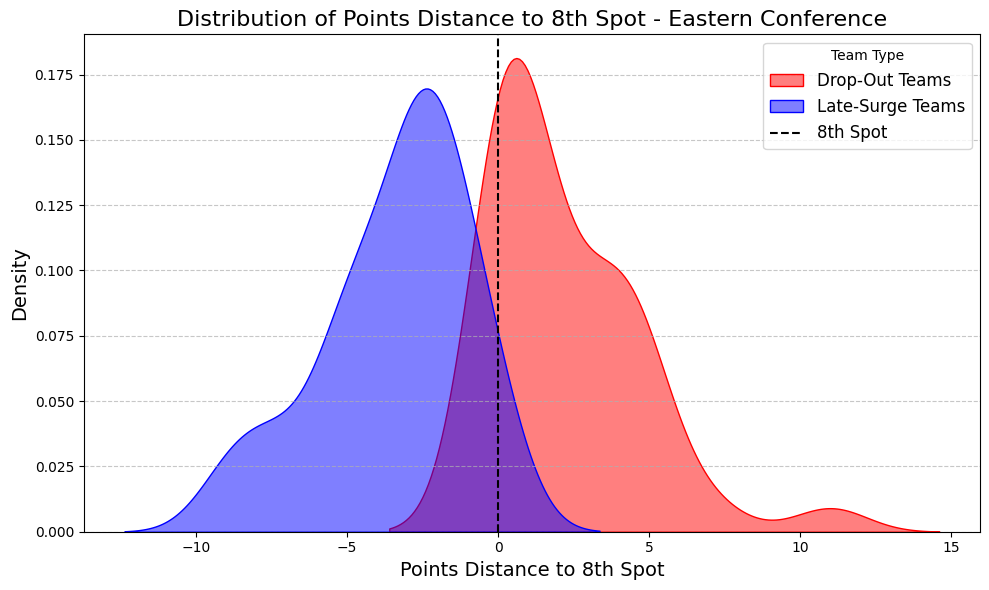

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the density for Drop-Out Teams
sns.kdeplot(
    data=drop_out_east,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Drop-Out Teams",
    color="red",
)

# Plot the density for Late-Surge Teams
sns.kdeplot(
    data=late_surge_east,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Late-Surge Teams",
    color="blue",
)

# Add vertical line for 8th spot (distance = 0)
plt.axvline(0, color="black", linestyle="--", label="8th Spot")

# Add labels and legend
plt.title(
    "Distribution of Points Distance to 8th Spot - Eastern Conference", fontsize=16
)
plt.xlabel("Points Distance to 8th Spot", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Team Type", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


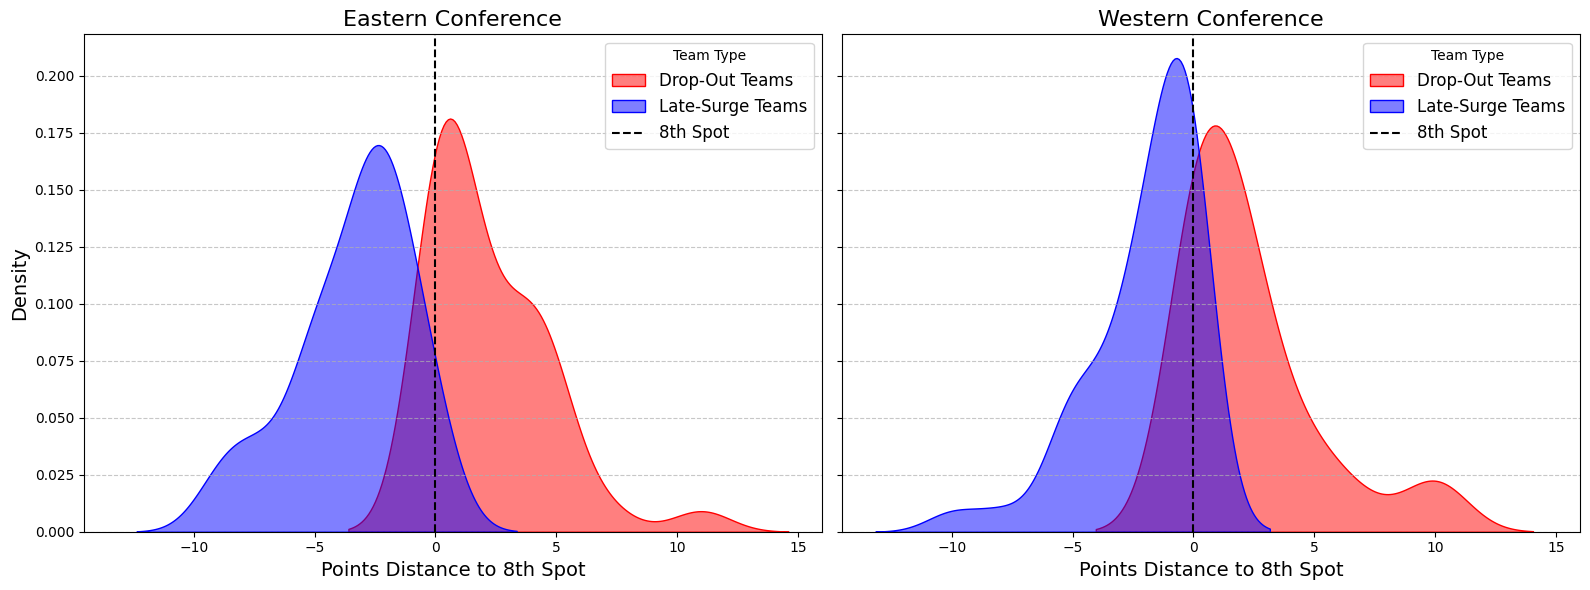

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Eastern Conference plot
sns.kdeplot(
    data=drop_out_east,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Drop-Out Teams",
    color="red",
    ax=axes[0],
)
sns.kdeplot(
    data=late_surge_east,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Late-Surge Teams",
    color="blue",
    ax=axes[0],
)
axes[0].axvline(0, color="black", linestyle="--", label="8th Spot")
axes[0].set_title("Eastern Conference", fontsize=16)
axes[0].set_xlabel("Points Distance to 8th Spot", fontsize=14)
axes[0].set_ylabel("Density", fontsize=14)
axes[0].legend(title="Team Type", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Western Conference plot
sns.kdeplot(
    data=drop_out_west,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Drop-Out Teams",
    color="red",
    ax=axes[1],
)
sns.kdeplot(
    data=late_surge_west,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Late-Surge Teams",
    color="blue",
    ax=axes[1],
)
axes[1].axvline(0, color="black", linestyle="--", label="8th Spot")
axes[1].set_title("Western Conference", fontsize=16)
axes[1].set_xlabel("Points Distance to 8th Spot", fontsize=14)
axes[1].legend(title="Team Type", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import gaussian_kde

# Extract the data for Drop-Out Teams
data_drop_out = drop_out_east["tx_points_distance"].dropna()
kde_drop_out = gaussian_kde(data_drop_out)

# Generate x values and calculate densities
x_vals = np.linspace(data_drop_out.min(), data_drop_out.max(), 1000)
y_vals = kde_drop_out(x_vals)
drop_out_peak = x_vals[np.argmax(y_vals)]
print(f"Density Peak for Drop-Out Teams: {drop_out_peak:.2f}")


Density Peak for Drop-Out Teams: 0.61


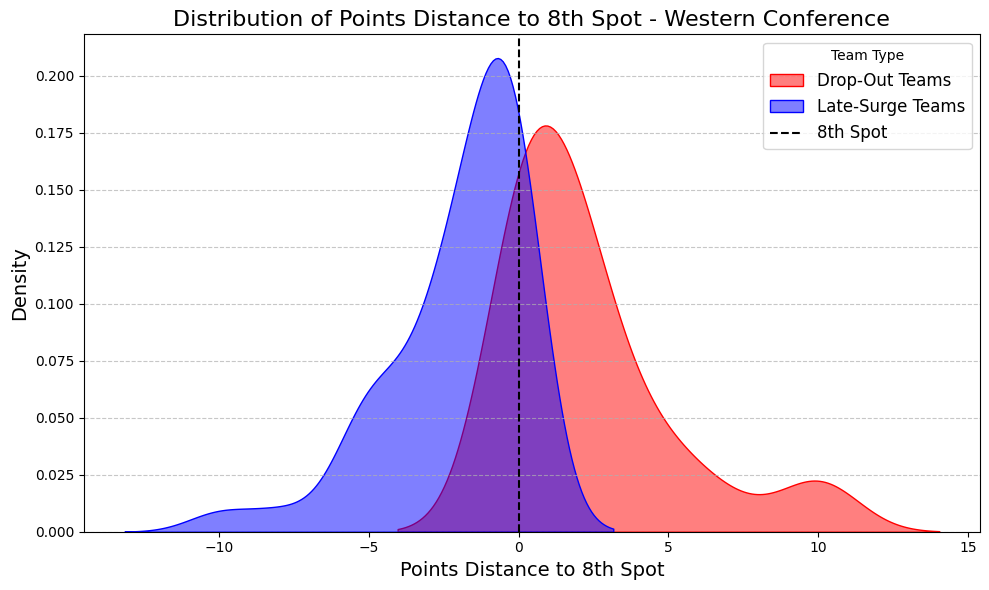

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the density for Drop-Out Teams
sns.kdeplot(
    data=drop_out_west,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Drop-Out Teams",
    color="red",
)

# Plot the density for Late-Surge Teams
sns.kdeplot(
    data=late_surge_west,
    x="tx_points_distance",
    fill=True,
    alpha=0.5,
    label="Late-Surge Teams",
    color="blue",
)

# Add vertical line for 8th spot (distance = 0)
plt.axvline(0, color="black", linestyle="--", label="8th Spot")

# Add labels and legend
plt.title(
    "Distribution of Points Distance to 8th Spot - Western Conference", fontsize=16
)
plt.xlabel("Points Distance to 8th Spot", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Team Type", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
thanksgiving_train_clean.columns

Index(['season_id', 'conference', 'thanksgiving', 'gamesPlayed',
       'tx_goal_diff', 'tx_goal_diff_pct', 'tx_GA', 'tx_GF', 'tx_gf_pctg',
       'tx_points_pct', 'tx_points', 'tx_streak_code', 'tx_streak_count',
       'tx_win_pctg', 'team_name', 'tri_code', 'season_end', 'end_goal_diff',
       'end_goal_diff_pct', 'end_GA', 'end_GF', 'end_gf_pctg',
       'end_points_pct', 'end_points', 'end_win_pctg', 'end_streak_code',
       'end_streak_count', 'goal_diff_pct_change', 'status_a', 'status_b'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Apply one-hot encoding to the 'conference' column
X = thanksgiving_train_clean[
    ["tx_points", "tx_points_pct", "tx_goal_diff", "thanksgiving"]
]
X = pd.get_dummies(X, drop_first=True)

# Add the encoded 'conference' column
X["conference"] = thanksgiving_train_clean["conference"].map(
    {"eastern": 0, "western": 1}
)

# Define target
y = thanksgiving_train_clean["status_b"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the random forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


              precision    recall  f1-score   support

           0       0.68      0.72      0.70        57
           1       0.78      0.75      0.77        77

    accuracy                           0.74       134
   macro avg       0.73      0.74      0.73       134
weighted avg       0.74      0.74      0.74       134

tx_points: 0.1601
tx_points_pct: 0.3083
tx_goal_diff: 0.3145
thanksgiving: 0.2171
conference: 0.0000


In [24]:
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_code,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_code,end_streak_count,goal_diff_pct_change,status_a,status_b
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,W,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,L,1.0,0.604213,1,1
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,W,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,W,2.0,-0.497677,1,1
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,W,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,L,1.0,-0.391463,1,1
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,L,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,W,2.0,-0.079558,1,1
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,L,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,L,1.0,-0.098845,1,1


In [ ]:
# Create streak features
def calculate_streak(row, streak_code_col):
    """
    Calculates the streak value based on the streak code column provided.
    W = 1, L = -1, and other cases will be 0 (or missing streak).
    """
    if row[streak_code_col] == "W":
        return 1  # Win streak is positive
    elif row[streak_code_col] == "L":
        return -1  # Loss streak is negative
    else:
        return 0  # Handle cases where streak data might be missing or undefined


# Apply the function to calculate Thanksgiving streak
thanksgiving_train_clean["thanksgiving_streak"] = thanksgiving_train_clean.apply(
    calculate_streak, axis=1, streak_code_col="tx_streak_code"
)

# Apply the function to calculate Season-end streak
thanksgiving_train_clean["season_end_streak"] = thanksgiving_train_clean.apply(
    calculate_streak, axis=1, streak_code_col="end_streak_code"
)

# Drop the original streak columns (optional)
thanksgiving_train_clean = thanksgiving_train_clean.drop(
    columns=["tx_streak_code", "end_streak_code"]
)

# Check the result
thanksgiving_train_clean.head()


,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

# Example of applying one-hot encoding to categorical features (including 'conference')
X = thanksgiving_train_clean[
    ["tx_points", "tx_points_pct", "tx_goal_diff", "thanksgiving", "conference"]
]
X = pd.get_dummies(X, drop_first=True)

# Define target
y = thanksgiving_train_clean["status_b"]  # 1 if made playoffs, 0 otherwise

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance
importances = xgb_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


              precision    recall  f1-score   support

           0       0.63      0.72      0.67        57
           1       0.77      0.69      0.73        77

    accuracy                           0.70       134
   macro avg       0.70      0.70      0.70       134
weighted avg       0.71      0.70      0.70       134

tx_points: 0.1544
tx_points_pct: 0.3484
tx_goal_diff: 0.1879
thanksgiving: 0.1643
conference_Western: 0.1449


In [27]:
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1


In [ ]:
# Assuming 'thanksgiving_train_clean' has columns 'teamName' and 'season_end_winPctg' for season-end points percentage

train_team_strength = {}

# Iterate through the DataFrame to create the team_strength dictionary
for _, row in thanksgiving_train_clean.iterrows():
    team_name = row["team_name"]  # Team name
    win_pctg = row["end_win_pctg"]  # Season-end win percentage (points percentage)

    # Store the team's strength in the dictionary
    train_team_strength[team_name] = win_pctg

# Check the result
train_team_strength


{'Toronto Maple Leafs': 0.560976,
 'Philadelphia Flyers': 0.463415,
 'Carolina Hurricanes': 0.634146,
 'Ottawa Senators': 0.45122,
 'Buffalo Sabres': 0.47561,
 'Pittsburgh Penguins': 0.463415,
 'New Jersey Devils': 0.463415,
 'New York Rangers': 0.670732,
 'Boston Bruins': 0.573171,
 'Tampa Bay Lightning': 0.54878,
 'Washington Capitals': 0.487805,
 'New York Islanders': 0.47561,
 'Florida Panthers': 0.634146,
 'Atlanta Thrashers': 0.414634,
 'Montréal Canadiens': 0.365854,
 'Colorado Avalanche': 0.609756,
 'St. Louis Blues': 0.52439,
 'San Jose Sharks': 0.231707,
 'Vancouver Canucks': 0.609756,
 'Edmonton Oilers': 0.597561,
 'Phoenix Coyotes': 0.45122,
 'Dallas Stars': 0.634146,
 'Detroit Red Wings': 0.5,
 'Los Angeles Kings': 0.536585,
 'Anaheim Ducks': 0.329268,
 'Nashville Predators': 0.573171,
 'Chicago Blackhawks': 0.280488,
 'Calgary Flames': 0.463415,
 'Columbus Blue Jackets': 0.329268,
 'Minnesota Wild': 0.47561,
 'Winnipeg Jets': 0.634146,
 'Arizona Coyotes': 0.439024,
 'Vega

In [29]:
thanksgiving_train_clean.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1


In [ ]:
season_start_dates = {
    "20002001": "2000-10-04",
    "20012002": "2001-10-03",
    "20022003": "2002-10-09",
    "20032004": "2003-10-08",
    "20052006": "2005-10-05",
    "20062007": "2006-10-04",
    "20072008": "2007-09-29",
    "20082009": "2008-10-04",
    "20092010": "2009-10-01",
    "20102011": "2010-10-07",
    "20112012": "2011-10-06",
    "20122013": "2013-01-19",
    "20132014": "2013-10-01",
    "20142015": "2014-10-08",
    "20152016": "2015-10-07",
    "20162017": "2016-10-12",
    "20172018": "2017-10-04",
    "20182019": "2018-10-04",
    "20192020": "2019-10-02",
    "20202021": "2021-01-13",
    "20212022": "2021-10-12",
    "20222023": "2022-10-11",
    "20232024": "2023-10-11",
}


In [ ]:
# get games

# Initialize the DataFrame
daily_games = pd.DataFrame()

base_url = "https://api-web.nhle.com/v1/schedule/"
# start_date = datetime.strptime("2023-10-09", "%Y-%m-%d")
# end_date = datetime.strptime("2024-04-17", "%Y-%m-%d")

start_date = datetime.strptime("2000-10-04", "%Y-%m-%d")
end_date = datetime.strptime("2000-11-23", "%Y-%m-%d")


current_date = start_date

# Set to keep track of unique dates
seen_dates = set()

while current_date <= end_date:
    # Format the date as 'YYYY-MM-DD'
    formatted_date = current_date.strftime("%Y-%m-%d")
    api_url = f"{base_url}{formatted_date}"

    # Make the API request
    response = requests.get(api_url)

    if response.status_code == 200:
        # The response content can be accessed using response.text
        response_text = response.text
    # pprint(response_text)
    else:
        print(f"Request failed with status code {response.status_code}")

    json_data = json.loads(response_text)

    game_week = json_data["gameWeek"]
    game_week_df = pd.DataFrame(game_week)

    game_week_df = game_week_df[game_week_df["numberOfGames"] != 0]

    # Filter out rows with duplicate dates
    if formatted_date not in seen_dates:
        seen_dates.add(formatted_date)
        daily_games = pd.concat([daily_games, game_week_df], ignore_index=True)
    else:
        print(f"Failed to retrieve data for {formatted_date}")

    # Move to the next week
    current_date += timedelta(weeks=1)
    # Filter out rows where 'date' is after the end date
    daily_games["date"] = pd.to_datetime(daily_games["date"])
    daily_games = daily_games[daily_games["date"] <= end_date]

    # Reset index after filtering
    daily_games.reset_index(drop=True, inplace=True)

    game_week_details = pd.json_normalize(daily_games["games"])
game_week_details.tail()


# in order to extract the data properly, it needs to be stored in a dictionary. This extracts each of the games from the cells

dfs = {}

# Loop through the iterations (30 times)
for i in range(0, len(game_week_details.columns)):
    api_response = game_week

    if api_response is not None:
        # Extract relevant data from the API response and normalize it
        game_info = pd.json_normalize(game_week_details[i])

        # Create a DataFrame for this iteration
        df_name = f"game_test{i}"  # Generate a unique variable name
        dfs[df_name] = pd.DataFrame(game_info)
    else:
        # Handle the case where the API request failed
        print(f"API request failed for index {i}")

# Then I combine all of the dfs in the list by concatenation to create a single df. now all of the game data is spread out across each row.
combined_df = pd.concat(dfs.values(), ignore_index=True)
combined_df.dropna(how="all", inplace=True)


combined_df = combined_df[
    [
        "id",
        "season",
        "startTimeUTC",
        "awayTeam.id",
        "awayTeam.abbrev",
        "homeTeam.id",
        "homeTeam.abbrev",
        "awayTeam.score",
        "homeTeam.score",
    ]
]


combined_df = combined_df.convert_dtypes()
combined_df["id"] = combined_df["id"].astype(str)


# Assuming '<NA>' is a string, replace it with np.nan
combined_df["id"] = combined_df["id"].replace("<NA>", np.nan)

# Drop rows with NaN values in the 'link' column
combined_df = combined_df.dropna(subset=["id"])
combined_df["startTimeUTC"] = pd.to_datetime(combined_df["startTimeUTC"])
combined_df = combined_df.rename(columns={"id": "game_id"})
combined_df = combined_df.sort_values("game_id").reset_index()


# Specify the UTC time zone
utc_timezone = pytz.utc

# Specify the target time zone (Eastern Time)
eastern_timezone = pytz.timezone("America/New_York")

# Convert 'startTimeUTC' to Eastern Time
combined_df["game_date_time"] = combined_df["startTimeUTC"].dt.tz_convert(
    eastern_timezone
)
combined_df["game_date_time"] = pd.to_datetime(combined_df["game_date_time"])
combined_df["start_time"] = (
    combined_df["game_date_time"].dt.strftime("%I:%M %p").str.lstrip("0").str.lower()
)
combined_df["game_date"] = combined_df["game_date_time"].dt.strftime("%Y-%m-%d")
combined_df.drop("startTimeUTC", axis=1, inplace=True)
# combined_df = combined_df[combined_df['game_date'] == formatted_date]
combined_df.sort_values(by="game_id")
# print("combined_df done")
combined_df.head()


,index,game_id,season,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,awayTeam.score,homeTeam.score,game_date_time,start_time,game_date
0,0,2000020001,20002001,21,COL,25,DAL,2,2,2000-10-04 19:00:00-04:00,7:00 pm,2000-10-04
1,1,2000020002,20002001,9,OTT,6,BOS,4,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
2,52,2000020003,20002001,16,CHI,7,BUF,2,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
3,103,2000020004,20002001,23,VAN,4,PHI,3,6,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
4,154,2000020005,20002001,17,DET,20,CGY,4,3,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05


In [ ]:
# Define season start and thanksgiving dates
season_start_dates = {
    "20002001": "2000-10-04",
    "20012002": "2001-10-03",
    "20022003": "2002-10-09",
    "20032004": "2003-10-08",
    "20052006": "2005-10-05",
    "20062007": "2006-10-04",
    "20072008": "2007-09-29",
    "20082009": "2008-10-04",
    "20092010": "2009-10-01",
    "20102011": "2010-10-07",
    "20112012": "2011-10-06",
    "20122013": "2013-01-19",
    "20132014": "2013-10-01",
    "20142015": "2014-10-08",
    "20152016": "2015-10-07",
    "20162017": "2016-10-12",
    "20172018": "2017-10-04",
    "20182019": "2018-10-04",
    "20192020": "2019-10-02",
    "20202021": "2021-01-13",
    "20212022": "2021-10-12",
    "20222023": "2022-10-11",
    "20232024": "2023-10-11",
}

thanksgiving_dates = {
    "20002001": "2000-11-23",
    "20012002": "2001-11-22",
    "20022003": "2002-11-28",
    "20032004": "2003-11-27",
    "20052006": "2005-11-24",
    "20062007": "2006-11-23",
    "20072008": "2007-11-22",
    "20082009": "2008-11-27",
    "20092010": "2009-11-26",
    "20102011": "2010-11-25",
    "20112012": "2011-11-24",
    "20122013": "2013-02-13",
    "20132014": "2013-11-28",
    "20142015": "2014-11-27",
    "20152016": "2015-11-26",
    "20162017": "2016-11-24",
    "20172018": "2017-11-23",
    "20182019": "2018-11-22",
    "20192020": "2019-11-28",
    "20202021": "2021-03-04",
    "20212022": "2021-02-15",
    "20222023": "2022-11-24",
    "20232024": "2023-11-23",
    "20242025": "2024-11-28",
}

# Initialize the DataFrame
daily_games = pd.DataFrame()

# Base URL for the API
base_url = "https://api-web.nhle.com/v1/schedule/"

# Loop through each season and get data
for season_id, season_start in season_start_dates.items():
    start_date = datetime.strptime(season_start, "%Y-%m-%d")
    end_date = datetime.strptime(thanksgiving_dates[season_id], "%Y-%m-%d")

    current_date = start_date
    seen_dates = set()

    # Loop through the season by week
    while current_date <= end_date:
        # Format the date as 'YYYY-MM-DD'
        formatted_date = current_date.strftime("%Y-%m-%d")
        api_url = f"{base_url}{formatted_date}"

        # Make the API request
        response = requests.get(api_url)

        if response.status_code == 200:
            response_text = response.text
        else:
            print(
                f"Request failed for {formatted_date} with status code {response.status_code}"
            )
            current_date += timedelta(weeks=1)
            continue

        # Parse the JSON response
        json_data = json.loads(response_text)

        # Process the game data
        if "gameWeek" in json_data:
            game_week = json_data["gameWeek"]
            game_week_df = pd.DataFrame(game_week)

            # Filter out weeks with no games
            game_week_df = game_week_df[game_week_df["numberOfGames"] != 0]

            # Filter out duplicate dates for the season
            if formatted_date not in seen_dates:
                seen_dates.add(formatted_date)
                game_week_df["season_id"] = season_id
                daily_games = pd.concat([daily_games, game_week_df], ignore_index=True)
            else:
                print(f"Duplicate data found for {formatted_date}")
        else:
            print(f"No 'gameWeek' data found for {formatted_date}")

        # Move to the next week
        current_date += timedelta(weeks=1)

# Convert the 'date' column to datetime format
daily_games["date"] = pd.to_datetime(daily_games["date"])
daily_games = daily_games[daily_games["date"] <= end_date]

# Reset index
daily_games.reset_index(drop=True, inplace=True)

# Normalize the 'games' data if it exists
if "games" in daily_games.columns:
    game_week_details = pd.json_normalize(daily_games["games"])
else:
    print("No 'games' column found. Please check the data structure.")

# Create a dictionary for the extracted data
dfs = {}

# Loop through the iterations (game details)
for i in range(len(game_week_details.columns)):
    api_response = game_week_details[i]

    if api_response is not None:
        game_info = pd.json_normalize(api_response)
        df_name = f"game_test{i}"  # Unique name for each game
        dfs[df_name] = pd.DataFrame(game_info)
    else:
        print(f"API request failed for index {i}")

# Combine all the game data into a single DataFrame
combined_df = pd.concat(dfs.values(), ignore_index=True)
combined_df.dropna(how="all", inplace=True)

# Filter relevant columns
combined_df = combined_df[
    [
        "id",
        "season",
        "startTimeUTC",
        "awayTeam.id",
        "awayTeam.abbrev",
        "homeTeam.id",
        "homeTeam.abbrev",
        "awayTeam.score",
        "homeTeam.score",
    ]
]

# Convert data types
combined_df = combined_df.convert_dtypes()
combined_df["id"] = combined_df["id"].astype(str)

# Handle missing or invalid data
combined_df["id"] = combined_df["id"].replace("<NA>", pd.NA)

# Drop rows with NaN values in the 'id' column
combined_df = combined_df.dropna(subset=["id"])

# Convert 'startTimeUTC' to datetime
combined_df["startTimeUTC"] = pd.to_datetime(combined_df["startTimeUTC"])

# Convert to Eastern Time
utc_timezone = pytz.utc
eastern_timezone = pytz.timezone("America/New_York")

combined_df["game_date_time"] = combined_df["startTimeUTC"].dt.tz_convert(
    eastern_timezone
)
combined_df["game_date_time"] = pd.to_datetime(combined_df["game_date_time"])

# Extract time and date details
combined_df["start_time"] = (
    combined_df["game_date_time"].dt.strftime("%I:%M %p").str.lstrip("0").str.lower()
)
combined_df["game_date"] = combined_df["game_date_time"].dt.strftime("%Y-%m-%d")

# Clean up the final DataFrame
combined_df.drop("startTimeUTC", axis=1, inplace=True)
combined_df.sort_values(by="id", inplace=True)
combined_df.reset_index(drop=True, inplace=True)

# Output the final combined DataFrame (this can be called later)
train_game_summary = combined_df

# Display the final DataFrame (optional)
train_game_summary.head()


,id,season,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,awayTeam.score,homeTeam.score,game_date_time,start_time,game_date
0,2000020001,20002001,21,COL,25,DAL,2,2,2000-10-04 19:00:00-04:00,7:00 pm,2000-10-04
1,2000020002,20002001,9,OTT,6,BOS,4,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
2,2000020003,20002001,16,CHI,7,BUF,2,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
3,2000020004,20002001,23,VAN,4,PHI,3,6,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05
4,2000020005,20002001,17,DET,20,CGY,4,3,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05


In [33]:
train_game_summary.tail()

,id,season,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,awayTeam.score,homeTeam.score,game_date_time,start_time,game_date
7873,2023020288,20232024,20,CGY,18,NSH,2,4,2023-11-22 21:00:00-05:00,9:00 pm,2023-11-22
7874,2023020289,20232024,54,VGK,25,DAL,2,1,2023-11-22 21:30:00-05:00,9:30 pm,2023-11-22
7875,2023020290,20232024,8,MTL,24,ANA,4,3,2023-11-22 22:00:00-05:00,10:00 pm,2023-11-22
7876,2023020291,20232024,23,VAN,21,COL,2,5,2023-11-22 22:00:00-05:00,10:00 pm,2023-11-22
7877,2023020292,20232024,28,SJS,55,SEA,1,7,2023-11-22 22:00:00-05:00,10:00 pm,2023-11-22


In [ ]:
# Step 1: Calculate each team's win percentage based on game outcomes
team_stats = []


def calculate_team_win_percentage(team_abbrev, df):
    # Count wins as the team being either home or away
    wins = len(
        df[
            (df["awayTeam.abbrev"] == team_abbrev)
            & (df["awayTeam.score"] > df["homeTeam.score"])
        ]
    ) + len(
        df[
            (df["homeTeam.abbrev"] == team_abbrev)
            & (df["homeTeam.score"] > df["awayTeam.score"])
        ]
    )
    games = len(
        df[
            (df["awayTeam.abbrev"] == team_abbrev)
            | (df["homeTeam.abbrev"] == team_abbrev)
        ]
    )
    win_percentage = wins / games if games > 0 else 0
    return win_percentage


# Calculate win percentages for all teams
team_abbrevs = pd.concat(
    [train_game_summary["awayTeam.abbrev"], train_game_summary["homeTeam.abbrev"]]
).unique()
for team_abbrev in team_abbrevs:
    win_percentage = calculate_team_win_percentage(team_abbrev, train_game_summary)
    team_stats.append({"team_abbrev": team_abbrev, "win_percentage": win_percentage})

# Convert team_stats into a DataFrame
train_team_stats = pd.DataFrame(team_stats)

# Step 2: Map the win percentages to final_df
train_game_summary["awayTeam_win_percentage"] = train_game_summary[
    "awayTeam.abbrev"
].map(train_team_stats.set_index("team_abbrev")["win_percentage"])
train_game_summary["homeTeam_win_percentage"] = train_game_summary[
    "homeTeam.abbrev"
].map(train_team_stats.set_index("team_abbrev")["win_percentage"])
train_game_summary.head()

,id,season,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,awayTeam.score,homeTeam.score,game_date_time,start_time,game_date,awayTeam_win_percentage,homeTeam_win_percentage
0,2000020001,20002001,21,COL,25,DAL,2,2,2000-10-04 19:00:00-04:00,7:00 pm,2000-10-04,0.526419,0.516378
1,2000020002,20002001,9,OTT,6,BOS,4,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05,0.488189,0.568047
2,2000020003,20002001,16,CHI,7,BUF,2,4,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05,0.476923,0.436538
3,2000020004,20002001,23,VAN,4,PHI,3,6,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05,0.509259,0.468872
4,2000020005,20002001,17,DET,20,CGY,4,3,2000-10-05 19:00:00-04:00,7:00 pm,2000-10-05,0.538752,0.446565


In [ ]:
# Step 3: Calculate SOS for each team
# Calculate SOS for away teams, including season
away_team_sos = (
    train_game_summary.groupby(["season", "awayTeam.abbrev"])["homeTeam_win_percentage"]
    .mean()
    .reset_index()
)
away_team_sos.rename(columns={"homeTeam_win_percentage": "SOS"}, inplace=True)

# Calculate SOS for home teams, including season
home_team_sos = (
    train_game_summary.groupby(["season", "homeTeam.abbrev"])["awayTeam_win_percentage"]
    .mean()
    .reset_index()
)
home_team_sos.rename(columns={"awayTeam_win_percentage": "SOS"}, inplace=True)

# Merge the SOS data for both away and home teams
team_sos = pd.concat([away_team_sos, home_team_sos], axis=0)

# Group by season and team abbreviation to compute the average SOS across all occurrences
team_sos = team_sos.groupby(["season", "awayTeam.abbrev"])["SOS"].mean().reset_index()

# Rename the column for clarity
team_sos.rename(
    columns={"awayTeam.abbrev": "tri_code", "season": "season_id"}, inplace=True
)
train_team_sos = team_sos
# Output the final SOS data
print(train_team_sos[["season_id", "tri_code", "SOS"]])


     season_id tri_code       SOS
0     20002001      ANA  0.476834
1     20002001      ATL  0.499148
2     20002001      BOS  0.483954
3     20002001      BUF  0.498382
4     20002001      CAR  0.498285
5     20002001      CBJ  0.505619
6     20002001      CGY  0.484916
7     20002001      CHI  0.490511
8     20002001      COL  0.469649
9     20002001      DAL  0.469268
10    20002001      DET  0.465110
11    20002001      EDM  0.489787
12    20002001      FLA  0.490533
13    20002001      LAK  0.478115
14    20002001      MIN  0.487245
15    20002001      MTL  0.478069
16    20002001      NJD  0.479639
17    20002001      NSH  0.500788
18    20002001      NYI  0.476886
19    20002001      NYR  0.477849
20    20002001      OTT  0.492740
21    20002001      PHI  0.484974
22    20002001      PHX  0.484835
23    20002001      PIT  0.508117
24    20002001      SJS  0.475517
25    20002001      STL  0.487560
26    20002001      TBL  0.497262
27    20002001      TOR  0.493188
28    20002001

In [ ]:
thanksgiving_standings = thanksgiving_standings.rename(
    columns={"teamAbbrev.default": "tri_code"}
)
thanksgiving_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   conferenceName        732 non-null    object 
 1   conferenceSequence    732 non-null    int64  
 2   divisionName          732 non-null    object 
 3   divisionSequence      732 non-null    int64  
 4   gamesPlayed           732 non-null    int64  
 5   goalDifferential      732 non-null    int64  
 6   goalDifferentialPctg  732 non-null    float64
 7   goalAgainst           732 non-null    int64  
 8   goalFor               732 non-null    int64  
 9   goalsForPctg          732 non-null    float64
 10  pointPctg             732 non-null    float64
 11  points                732 non-null    int64  
 12  streakCode            732 non-null    object 
 13  streakCount           732 non-null    int64  
 14  winPctg               732 non-null    float64
 15  teamName.default      7

In [37]:
train_team_sos.tail(25)

,season_id,tri_code,SOS
643,20232024,CHI,0.494758
644,20232024,COL,0.508915
645,20232024,DAL,0.485746
646,20232024,DET,0.491613
647,20232024,EDM,0.487273
648,20232024,FLA,0.501679
649,20232024,LAK,0.489790
650,20232024,MIN,0.488986
651,20232024,MTL,0.505635
652,20232024,NJD,0.510502


In [38]:
thanksgiving_train_clean.columns

Index(['season_id', 'conference', 'thanksgiving', 'gamesPlayed',
       'tx_goal_diff', 'tx_goal_diff_pct', 'tx_GA', 'tx_GF', 'tx_gf_pctg',
       'tx_points_pct', 'tx_points', 'tx_streak_count', 'tx_win_pctg',
       'team_name', 'tri_code', 'season_end', 'end_goal_diff',
       'end_goal_diff_pct', 'end_GA', 'end_GF', 'end_gf_pctg',
       'end_points_pct', 'end_points', 'end_win_pctg', 'end_streak_count',
       'goal_diff_pct_change', 'status_a', 'status_b', 'thanksgiving_streak',
       'season_end_streak'],
      dtype='object')

In [ ]:
train_team_stats = thanksgiving_train_clean.merge(
    train_team_sos, on=["tri_code", "season_id"], how="left"
)


# Step 5: Clean up final DataFrame and rename columns for clarity
train_team_stats.rename(columns={"homeTeam_win_percentage": "SOS"}, inplace=True)


train_team_stats.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,SOS
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0.493188
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0.484974
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0.498285
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0.492740
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0.498382


In [ ]:
num_teams_per_season_train = (
    train_team_stats.groupby("season_id")["team_name"].nunique().reset_index()
)
num_teams_per_season_train.rename(columns={"team_name": "num_teams"}, inplace=True)

In [ ]:
# Step 2: Merge the number of teams into your training dataset
train_team_stats = train_team_stats.merge(
    num_teams_per_season_train, on="season_id", how="left"
)

# Check if num_teams column has been added to training data
print(train_team_stats[["season_id", "num_teams"]].head())

   season_id  num_teams
0   20002001         30
1   20002001         30
2   20002001         30
3   20002001         30
4   20002001         30


In [42]:
train_team_stats.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,SOS,num_teams
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0.493188,30
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0.484974,30
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0.498285,30
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0.492740,30
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0.498382,30


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

# Ensure SOS is merged into thanksgiving_clean and handle missing values
train_team_stats["SOS"] = train_team_stats["SOS"].fillna(train_team_stats["SOS"].mean())

# Add SOS to the feature set
X = train_team_stats[
    [
        "tx_points",
        "tx_points_pct",
        "tx_goal_diff",
        "thanksgiving",
        "conference",
        "SOS",
        "num_teams",
    ]
]

# Apply one-hot encoding to categorical variables
X = pd.get_dummies(X, drop_first=True)

# Define target
y = train_team_stats["status_b"]  # 1 if made playoffs, 0 otherwise

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance
importances = xgb_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


              precision    recall  f1-score   support

           0       0.66      0.72      0.69        57
           1       0.78      0.73      0.75        77

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.73      0.72      0.73       134

tx_points: 0.1020
tx_points_pct: 0.3187
tx_goal_diff: 0.1511
thanksgiving: 0.0999
SOS: 0.0992
num_teams: 0.1071
conference_Western: 0.1221


In [44]:
train_team_stats.head()

,season_id,conference,thanksgiving,gamesPlayed,tx_goal_diff,tx_goal_diff_pct,tx_GA,tx_GF,tx_gf_pctg,tx_points_pct,tx_points,tx_streak_count,tx_win_pctg,team_name,tri_code,season_end,end_goal_diff,end_goal_diff_pct,end_GA,end_GF,end_gf_pctg,end_points_pct,end_points,end_win_pctg,end_streak_count,goal_diff_pct_change,status_a,status_b,thanksgiving_streak,season_end_streak,SOS,num_teams
0,20002001,Eastern,1,22,20,0.909091,43,63,2.863636,0.636364,28,3,0.545455,Toronto Maple Leafs,TOR,7,25.0,0.304878,207.0,232.0,2.829268,0.548780,90.0,0.451220,1.0,0.604213,1,1,1,-1,0.493188,30
1,20002001,Eastern,2,21,-2,-0.095238,58,56,2.666667,0.571429,24,6,0.476190,Philadelphia Flyers,PHI,4,33.0,0.402439,207.0,240.0,2.926829,0.609756,100.0,0.524390,2.0,-0.497677,1,1,1,1,0.484974,30
2,20002001,Eastern,3,20,-11,-0.550000,58,47,2.350000,0.450000,18,1,0.350000,Carolina Hurricanes,CAR,8,-13.0,-0.158537,225.0,212.0,2.585366,0.536585,88.0,0.463415,1.0,-0.391463,1,1,1,-1,0.498285,30
3,20002001,Eastern,4,21,16,0.761905,52,68,3.238095,0.619048,26,1,0.523810,Ottawa Senators,OTT,2,69.0,0.841463,205.0,274.0,3.341463,0.664634,109.0,0.585366,2.0,-0.079558,1,1,-1,1,0.492740,30
4,20002001,Eastern,5,19,6,0.315789,45,51,2.684211,0.605263,23,2,0.526316,Buffalo Sabres,BUF,5,34.0,0.414634,184.0,218.0,2.658537,0.597561,98.0,0.560976,1.0,-0.098845,1,1,-1,-1,0.498382,30


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Select features and target
X = train_team_stats[
    [
        "tx_points",
        "tx_points_pct",
        "tx_goal_diff",
        "thanksgiving",
        "SOS",
        "conference",
        "num_teams",
    ]
]
X = pd.get_dummies(X, drop_first=True)  # Apply one-hot encoding for 'conference'

# Define the target
y = train_team_stats["status_b"]  # 1 for playoffs, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    "max_depth": [3, 5, 7],  # Depth of the tree
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "n_estimators": [100, 200, 300],  # Number of boosting rounds
    "subsample": [0.8, 1.0],  # Subsample ratio of the training instances
    "colsample_bytree": [0.8, 1.0],  # Subsample ratio of columns for each tree
    "gamma": [0, 1],  # Minimum loss reduction
    "reg_alpha": [0, 0.01, 0.1],  # L1 regularization term
    "reg_lambda": [1, 10],  # L2 regularization term
}


In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric="logloss"
)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Display the search progress
    n_jobs=-1,  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 

In [ ]:
# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Feature Importance
importances = best_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


              precision    recall  f1-score   support

           0       0.68      0.67      0.67        57
           1       0.76      0.77      0.76        77

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.72      0.72      0.72       134

tx_points: 0.0358
tx_points_pct: 0.4955
tx_goal_diff: 0.2255
thanksgiving: 0.1384
SOS: 0.0394
num_teams: 0.0248
conference_Western: 0.0405


### Predicting the current season

In [ ]:
current_season_test = thanksgiving_standings.query("season_id == 20242025")
current_season_test

,conferenceName,conferenceSequence,divisionName,divisionSequence,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,pointPctg,points,streakCode,streakCount,winPctg,teamName.default,tri_code,date,season_id
700,Eastern,1,Metropolitan,1,22,30,1.363636,58,88,4.000000,0.750000,33,W,2,0.727273,Carolina Hurricanes,CAR,11/28/2024,20242025
701,Eastern,2,Metropolitan,2,25,19,0.760000,65,84,3.360000,0.640000,32,L,1,0.600000,New Jersey Devils,NJD,11/28/2024,20242025
702,Eastern,3,Metropolitan,3,22,30,1.363636,60,90,4.090909,0.704545,31,W,2,0.681818,Washington Capitals,WSH,11/28/2024,20242025
703,Eastern,4,Atlantic,1,22,8,0.363636,57,65,2.954545,0.636364,28,L,1,0.590909,Toronto Maple Leafs,TOR,11/28/2024,20242025
704,Eastern,5,Atlantic,2,23,3,0.130435,77,80,3.478261,0.586957,27,W,1,0.565217,Florida Panthers,FLA,11/28/2024,20242025
705,Eastern,6,Metropolitan,4,21,11,0.523810,59,70,3.333333,0.595238,25,L,4,0.571429,New York Rangers,NYR,11/28/2024,20242025
706,Eastern,7,Atlantic,3,24,-18,-0.750000,75,57,2.375000,0.520833,25,W,1,0.458333,Boston Bruins,BOS,11/28/2024,20242025
707,Eastern,8,Atlantic,4,21,14,0.666667,66,80,3.809524,0.571429,24,L,1,0.523810,Tampa Bay Lightning,TBL,11/28/2024,20242025
708,Eastern,9,Atlantic,5,22,3,0.136364,66,69,3.136364,0.522727,23,L,1,0.500000,Buffalo Sabres,BUF,11/28/2024,20242025
709,Eastern,10,Metropolitan,5,23,-13,-0.565217,80,67,2.913043,0.500000,23,W,1,0.434783,Philadelphia Flyers,PHI,11/28/2024,20242025


In [ ]:
# Initialize the DataFrame
daily_games = pd.DataFrame()

base_url = "https://api-web.nhle.com/v1/schedule/"


start_date = datetime.strptime("2024-10-04", "%Y-%m-%d")
end_date = datetime.strptime("2024-11-28", "%Y-%m-%d")


current_date = start_date

# Set to keep track of unique dates
seen_dates = set()

while current_date <= end_date:
    # Format the date as 'YYYY-MM-DD'
    formatted_date = current_date.strftime("%Y-%m-%d")
    api_url = f"{base_url}{formatted_date}"

    # Make the API request
    response = requests.get(api_url)

    if response.status_code == 200:
        # The response content can be accessed using response.text
        response_text = response.text
    # pprint(response_text)
    else:
        print(f"Request failed with status code {response.status_code}")

    json_data = json.loads(response_text)

    game_week = json_data["gameWeek"]
    game_week_df = pd.DataFrame(game_week)

    game_week_df = game_week_df[game_week_df["numberOfGames"] != 0]

    # Filter out rows with duplicate dates
    if formatted_date not in seen_dates:
        seen_dates.add(formatted_date)
        daily_games = pd.concat([daily_games, game_week_df], ignore_index=True)
    else:
        print(f"Failed to retrieve data for {formatted_date}")

    # Move to the next week
    current_date += timedelta(weeks=1)
    # Filter out rows where 'date' is after the end date
    daily_games["date"] = pd.to_datetime(daily_games["date"])
    daily_games = daily_games[daily_games["date"] <= end_date]

    # Reset index after filtering
    daily_games.reset_index(drop=True, inplace=True)

    game_week_details = pd.json_normalize(daily_games["games"])


# in order to extract the data properly, it needs to be stored in a dictionary. This extracts each of the games from the cells

dfs = {}

# Loop through the iterations (30 times)
for i in range(0, len(game_week_details.columns)):
    api_response = game_week

    if api_response is not None:
        # Extract relevant data from the API response and normalize it
        game_info = pd.json_normalize(game_week_details[i])

        # Create a DataFrame for this iteration
        df_name = f"game_test{i}"  # Generate a unique variable name
        dfs[df_name] = pd.DataFrame(game_info)
    else:
        # Handle the case where the API request failed
        print(f"API request failed for index {i}")

# Then I combine all of the dfs in the list by concatenation to create a single df. now all of the game data is spread out across each row.
combined_df = pd.concat(dfs.values(), ignore_index=True)
combined_df.dropna(how="all", inplace=True)


combined_df = combined_df[
    [
        "id",
        "season",
        "startTimeUTC",
        "gameType",
        "awayTeam.id",
        "awayTeam.abbrev",
        "awayTeam.logo",
        "homeTeam.id",
        "homeTeam.abbrev",
        "homeTeam.logo",
        "homeTeam.placeName.default",
        "awayTeam.placeName.default",
        "awayTeam.score",
        "homeTeam.score",
        "winningGoalScorer.playerId",
        "winningGoalie.playerId",
        "gameState",
    ]
]


combined_df = combined_df.convert_dtypes()
combined_df["id"] = combined_df["id"].astype(str)

combined_df["link"] = (
    "https://api-web.nhle.com/v1/gamecenter/" + combined_df["id"] + "/play-by-play"
)

# Assuming '<NA>' is a string, replace it with np.nan
combined_df["id"] = combined_df["id"].replace("<NA>", np.nan)

# Drop rows with NaN values in the 'link' column
combined_df = combined_df.dropna(subset=["id"])
combined_df = combined_df.query('gameState == "OFF"')
combined_df["startTimeUTC"] = pd.to_datetime(combined_df["startTimeUTC"])
combined_df = combined_df.rename(columns={"id": "game_id"})
combined_df = combined_df.sort_values("game_id").reset_index()


# Specify the UTC time zone
utc_timezone = pytz.utc

# Specify the target time zone (Eastern Time)
eastern_timezone = pytz.timezone("America/New_York")

# Convert 'startTimeUTC' to Eastern Time
combined_df["game_date_time"] = combined_df["startTimeUTC"].dt.tz_convert(
    eastern_timezone
)
combined_df["game_date_time"] = pd.to_datetime(combined_df["game_date_time"])
combined_df["start_time"] = (
    combined_df["game_date_time"].dt.strftime("%I:%M %p").str.lstrip("0").str.lower()
)
combined_df["game_date"] = combined_df["game_date_time"].dt.strftime("%Y-%m-%d")
combined_df.drop("startTimeUTC", axis=1, inplace=True)
# combined_df = combined_df[combined_df['game_date'] == formatted_date]
combined_df.sort_values(by="game_id")
# print("combined_df done")
combined_df.head()


,index,game_id,season,gameType,awayTeam.id,awayTeam.abbrev,awayTeam.logo,homeTeam.id,homeTeam.abbrev,homeTeam.logo,homeTeam.placeName.default,awayTeam.placeName.default,awayTeam.score,homeTeam.score,winningGoalScorer.playerId,winningGoalie.playerId,gameState,link,game_date_time,start_time,game_date
0,0,2024020001,20242025,2,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,Buffalo,New Jersey,4,1,8480192,8474593,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-04 13:00:00-04:00,1:00 pm,2024-10-04
1,1,2024020002,20242025,2,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,New Jersey,Buffalo,1,3,8481032,8474596,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-05 10:00:00-04:00,10:00 am,2024-10-05
2,3,2024020003,20242025,2,19,STL,https://assets.nhle.com/logos/nhl/svg/STL_ligh...,55,SEA,https://assets.nhle.com/logos/nhl/svg/SEA_ligh...,Seattle,St. Louis,3,2,8479385,8476412,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 16:30:00-04:00,4:30 pm,2024-10-08
3,57,2024020004,20242025,2,6,BOS,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,13,FLA,https://assets.nhle.com/logos/nhl/svg/FLA_ligh...,Florida,Boston,4,6,8479981,8475683,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 19:00:00-04:00,7:00 pm,2024-10-08
4,111,2024020005,20242025,2,16,CHI,https://assets.nhle.com/logos/nhl/svg/CHI_ligh...,59,UTA,https://assets.nhle.com/logos/nhl/svg/UTA_ligh...,Utah,Chicago,2,5,8480849,8478971,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 22:00:00-04:00,10:00 pm,2024-10-08


In [121]:
test_current_season_game_summary = combined_df

In [ ]:
# Step 1: Calculate each team's win percentage based on game outcomes
team_stats = []


def calculate_team_win_percentage(team_abbrev, df):
    # Count wins as the team being either home or away
    wins = len(
        df[
            (df["awayTeam.abbrev"] == team_abbrev)
            & (df["awayTeam.score"] > df["homeTeam.score"])
        ]
    ) + len(
        df[
            (df["homeTeam.abbrev"] == team_abbrev)
            & (df["homeTeam.score"] > df["awayTeam.score"])
        ]
    )
    games = len(
        df[
            (df["awayTeam.abbrev"] == team_abbrev)
            | (df["homeTeam.abbrev"] == team_abbrev)
        ]
    )
    win_percentage = wins / games if games > 0 else 0
    return win_percentage


# Calculate win percentages for all teams
team_abbrevs = pd.concat(
    [
        test_current_season_game_summary["awayTeam.abbrev"],
        test_current_season_game_summary["homeTeam.abbrev"],
    ]
).unique()
for team_abbrev in team_abbrevs:
    win_percentage = calculate_team_win_percentage(
        team_abbrev, test_current_season_game_summary
    )
    team_stats.append({"team_abbrev": team_abbrev, "win_percentage": win_percentage})

# Convert team_stats into a DataFrame
test_current_team_stats = pd.DataFrame(team_stats)

# Step 2: Map the win percentages to final_df2
test_current_season_game_summary["awayTeam_win_percentage"] = (
    test_current_season_game_summary["awayTeam.abbrev"].map(
        test_current_team_stats.set_index("team_abbrev")["win_percentage"]
    )
)
test_current_season_game_summary["homeTeam_win_percentage"] = (
    test_current_season_game_summary["homeTeam.abbrev"].map(
        test_current_team_stats.set_index("team_abbrev")["win_percentage"]
    )
)
test_current_season_game_summary.head()

,index,game_id,season,gameType,awayTeam.id,awayTeam.abbrev,awayTeam.logo,homeTeam.id,homeTeam.abbrev,homeTeam.logo,homeTeam.placeName.default,awayTeam.placeName.default,awayTeam.score,homeTeam.score,winningGoalScorer.playerId,winningGoalie.playerId,gameState,link,game_date_time,start_time,game_date,awayTeam_win_percentage,homeTeam_win_percentage
0,0,2024020001,20242025,2,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,Buffalo,New Jersey,4,1,8480192,8474593,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-04 13:00:00-04:00,1:00 pm,2024-10-04,0.600000,0.500000
1,1,2024020002,20242025,2,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,New Jersey,Buffalo,1,3,8481032,8474596,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-05 10:00:00-04:00,10:00 am,2024-10-05,0.500000,0.600000
2,3,2024020003,20242025,2,19,STL,https://assets.nhle.com/logos/nhl/svg/STL_ligh...,55,SEA,https://assets.nhle.com/logos/nhl/svg/SEA_ligh...,Seattle,St. Louis,3,2,8479385,8476412,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 16:30:00-04:00,4:30 pm,2024-10-08,0.458333,0.478261
3,57,2024020004,20242025,2,6,BOS,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,13,FLA,https://assets.nhle.com/logos/nhl/svg/FLA_ligh...,Florida,Boston,4,6,8479981,8475683,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 19:00:00-04:00,7:00 pm,2024-10-08,0.458333,0.565217
4,111,2024020005,20242025,2,16,CHI,https://assets.nhle.com/logos/nhl/svg/CHI_ligh...,59,UTA,https://assets.nhle.com/logos/nhl/svg/UTA_ligh...,Utah,Chicago,2,5,8480849,8478971,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 22:00:00-04:00,10:00 pm,2024-10-08,0.363636,0.409091


In [123]:
test_current_season_game_summary.head()

,index,game_id,season,gameType,awayTeam.id,awayTeam.abbrev,awayTeam.logo,homeTeam.id,homeTeam.abbrev,homeTeam.logo,homeTeam.placeName.default,awayTeam.placeName.default,awayTeam.score,homeTeam.score,winningGoalScorer.playerId,winningGoalie.playerId,gameState,link,game_date_time,start_time,game_date,awayTeam_win_percentage,homeTeam_win_percentage
0,0,2024020001,20242025,2,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,Buffalo,New Jersey,4,1,8480192,8474593,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-04 13:00:00-04:00,1:00 pm,2024-10-04,0.600000,0.500000
1,1,2024020002,20242025,2,7,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,1,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,New Jersey,Buffalo,1,3,8481032,8474596,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-05 10:00:00-04:00,10:00 am,2024-10-05,0.500000,0.600000
2,3,2024020003,20242025,2,19,STL,https://assets.nhle.com/logos/nhl/svg/STL_ligh...,55,SEA,https://assets.nhle.com/logos/nhl/svg/SEA_ligh...,Seattle,St. Louis,3,2,8479385,8476412,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 16:30:00-04:00,4:30 pm,2024-10-08,0.458333,0.478261
3,57,2024020004,20242025,2,6,BOS,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,13,FLA,https://assets.nhle.com/logos/nhl/svg/FLA_ligh...,Florida,Boston,4,6,8479981,8475683,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 19:00:00-04:00,7:00 pm,2024-10-08,0.458333,0.565217
4,111,2024020005,20242025,2,16,CHI,https://assets.nhle.com/logos/nhl/svg/CHI_ligh...,59,UTA,https://assets.nhle.com/logos/nhl/svg/UTA_ligh...,Utah,Chicago,2,5,8480849,8478971,OFF,https://api-web.nhle.com/v1/gamecenter/2024020...,2024-10-08 22:00:00-04:00,10:00 pm,2024-10-08,0.363636,0.409091


In [ ]:
# Step 3: Calculate SOS for each team
# Calculate SOS for away teams, including season
away_team_sos = (
    test_current_season_game_summary.groupby(["season", "awayTeam.abbrev"])[
        "homeTeam_win_percentage"
    ]
    .mean()
    .reset_index()
)
away_team_sos.rename(columns={"homeTeam_win_percentage": "SOS"}, inplace=True)

# Calculate SOS for home teams, including season
home_team_sos = (
    test_current_season_game_summary.groupby(["season", "homeTeam.abbrev"])[
        "awayTeam_win_percentage"
    ]
    .mean()
    .reset_index()
)
home_team_sos.rename(columns={"awayTeam_win_percentage": "SOS"}, inplace=True)

# Merge the SOS data for both away and home teams
current_test_team_sos = pd.concat([away_team_sos, home_team_sos], axis=0)

# Group by season and team abbreviation to compute the average SOS across all occurrences
current_test_team_sos = (
    team_sos.groupby(["season_id", "awayTeam.abbrev"])["SOS"].mean().reset_index()
)

# Rename the column for clarity
current_test_team_sos.rename(
    columns={"awayTeam.abbrev": "tri_code", "season": "season_id"}, inplace=True
)

# Output the final SOS data
print(current_test_team_sos[["season_id", "tri_code", "SOS"]])


KeyError: 'awayTeam.abbrev'

In [ ]:
thanksgiving_standings.head()

In [ ]:
current_season_test["num_teams"] = 32
current_season_test.head()

In [ ]:
# Create streak features
def calculate_streak(row, streak_code_col):
    """
    Calculates the streak value based on the streak code column provided.
    W = 1, L = -1, and other cases will be 0 (or missing streak).
    """
    if row[streak_code_col] == "W":
        return 1  # Win streak is positive
    elif row[streak_code_col] == "L":
        return -1  # Loss streak is negative
    else:
        return 0  # Handle cases where streak data might be missing or undefined


# Apply the function to calculate Thanksgiving streak
current_season_test["game_streak"] = current_season_test.apply(
    calculate_streak, axis=1, streak_code_col="tx_streak_code"
)

# Apply the function to calculate Season-end streak
thanksgiving_train_clean["season_end_streak"] = thanksgiving_train_clean.apply(
    calculate_streak, axis=1, streak_code_col="end_streak_code"
)

# Drop the original streak columns (optional)
thanksgiving_train_clean = thanksgiving_train_clean.drop(
    columns=["tx_streak_code", "end_streak_code"]
)

# Check the result
thanksgiving_train_clean.head()


In [ ]:
current_prediction = current_season_test.merge(
    team_sos, on=["tri_code", "season_id"], how="left"
)


# Step 5: Clean up final DataFrame and rename columns for clarity
current_prediction.rename(columns={"homeTeam_win_percentage": "SOS"}, inplace=True)


current_prediction.head()

In [ ]:
current_test_df = current_prediction[
    [
        "teamName.default",
        "gamesPlayed",
        "points",
        "pointPctg",
        "goalDifferentialPctg",
        "conferenceSequence",
        "SOS",
        "conferenceName",
        "num_teams",
    ]
]
current_test_df.rename(
    columns={
        "teamName.default": "team_name",
        "points": "tx_points",
        "pointPctg": "tx_points_pct",
        "goalDifferentialPctg": "tx_goal_diff",
        "conferenceSequence": "thanksgiving",
        "conferenceName": "conference",
    },
    inplace=True,
)
current_test_df.head()

In [ ]:
# Step 1: Create dummy variables for 'conference'
current_test_df = pd.get_dummies(
    current_test_df, columns=["conference"], drop_first=True
)

# Step 2: Ensure 'conference_Western' exists, even if it's missing
if "conference_Western" not in current_test_df.columns:
    current_test_df["conference_Western"] = 0  # Add with all zeros if missing

# Step 3: Define the feature set for prediction
model_features = [
    "tx_points",
    "tx_points_pct",
    "tx_goal_diff",
    "thanksgiving",
    "SOS",
    "num_teams",
    "conference_Western",
]
prediction_features = current_test_df.reindex(columns=model_features, fill_value=0)

# Step 4: Make predictions
current_test_df["predicted_status"] = best_model.predict(prediction_features)

# Step 5: Keep a copy of identifying information (team name, etc.)
identifying_columns = [
    "team_name",
    "gamesPlayed",
    "conference_Western",
    "tx_points",
    "SOS",
]  # Adjust to your identifying column names
identifying_info = current_test_df[
    identifying_columns
].copy()  # Copy identifying columns

# Step 6: Add predictions to identifying information
current_test_results = identifying_info.copy()  # Copy identifying info into results_df
current_test_results["predicted_status"] = current_test_df[
    "predicted_status"
]  # Add predictions to results

# Step 7: Map predictions to human-readable labels
current_test_results["playoff_prediction"] = current_test_results[
    "predicted_status"
].map({1: "Make Playoffs", 0: "Miss Playoffs"})
current_test_results.head()

In [ ]:
current_test_results["projected_points"] = round(
    (current_test_results["tx_points"] / current_test_results["gamesPlayed"]) * 82
)
current_test_results

In [ ]:
current_test_results = current_test_results.sort_values(
    by=["conference_Western", "predicted_status", "projected_points"],
    ascending=[True, False, False],
)
current_test_results

### Interaction of SOS and points

In [ ]:
train_team_stats.head()


In [ ]:
current_test_df.head()

In [ ]:
current_test_df["points_sos_interaction"] = (
    current_test_df["tx_points"] * current_test_df["SOS"]
)  # test
train_team_stats["points_sos_interaction"] = (
    train_team_stats["tx_points"] * train_team_stats["SOS"]
)  # train
train_team_stats.head()

In [ ]:
# Step 1: Add the interaction feature to the training dataset (team_stats_df)
# team_stats_df['points_sos_interaction'] = team_stats_df['tx_points'] * team_stats_df['SOS']

# Step 2: Ensure 'conference_Western' exists in the training data
if "conference_Western" not in train_team_stats.columns:
    train_team_stats["conference_Western"] = 0  # Add with all zeros if missing

# Step 3: Define the feature set for training, including the interaction feature
model_features = [
    "tx_points",
    "tx_points_pct",
    "tx_goal_diff",
    "thanksgiving",
    "SOS",
    "num_teams",
    "conference_Western",
    "points_sos_interaction",
]

# Prepare the training data with the updated feature set
training_features = train_team_stats[model_features]

# Assuming the target variable is 'playoff_probability', fit the model
target = "status_b"
best_model.fit(
    training_features, train_team_stats[target]
)  # Retraining the model with the updated features

# Step 4: Add the interaction feature to the prediction dataset (prediction_df)
test_current_team_stats["points_sos_interaction"] = (
    test_current_team_stats["tx_points"] * test_current_team_stats["SOS"]
)

# Ensure the prediction dataset has the same features as the training dataset
prediction_features = test_current_team_stats[model_features]

# Step 5: Make predictions using the updated model and prediction dataset
test_current_team_stats["predicted_status"] = best_model.predict(prediction_features)

# Step 6: Keep a copy of identifying information for the final results
identifying_columns = [
    "team_name",
    "gamesPlayed",
    "conference_Western",
    "tx_points",
    "tx_points_pct",
    "SOS",
    "points_sos_interaction",
]
identifying_info = test_current_team_stats[identifying_columns].copy()

# Step 7: Add predictions to the identifying information
test_current_results_df = identifying_info.copy()
test_current_results_df["predicted_status"] = test_current_team_stats[
    "predicted_status"
]

# Step 8: Map the predicted status to human-readable labels
test_current_results_df["playoff_prediction"] = test_current_results_df[
    "predicted_status"
].map({1: "Make Playoffs", 0: "Miss Playoffs"})

# Step 9: Display the final results


In [ ]:
test_current_results_df.head(16)

In [ ]:
# Step 1: Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Step 2: Create the points-SOS interaction feature for the test set
# Assuming 'X_test' already contains 'tx_points' and 'SOS' columns
X_test["points_sos_interaction"] = X_test["tx_points"] * X_test["SOS"]

# Step 3: Ensure all necessary features are included in the model's prediction
# Here, I'm assuming the model expects 'points_sos_interaction' along with other features
# Ensure that your feature set contains the 'points_sos_interaction' column

# Step 4: Predict on the test set
y_pred = best_model.predict(X_test)

# Step 5: Evaluate the model's performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Step 6: Feature Importance
importances = best_model.feature_importances_
for feature, importance in zip(X_test.columns, importances):
    print(f"{feature}: {importance:.4f}")


In [ ]:
test_2019 = train_team_stats
test_2019 = test_2019.query("season_id == 20182019")
# Keep only the first 10 columns
# test_2019 = test_2019.iloc[:, :15]

test_2019.head()